# *Business Objective :*
***The project aims to analyze financial statements & determine if the information is positive, negative or neutral for businesses & the government. We will use R/Python to process the text & extract the relevant information. Emotion mining will also be used to extract emotions from the text data. We will present the analysis using charts like histograms, density plots, barplots & pie-plots. The end product will be made available to users through R Shiny or Flask/Streamlit.***

In [1]:
!pip install spacy

In [4]:
# Ignore anoying warnings
import warnings
warnings.filterwarnings("ignore")

# Import usefull libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk, re
import spacy
import string
import pickle

from spacy import displacy
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import (stopwords, wordnet)
from wordcloud import (WordCloud, STOPWORDS)
from sklearn.feature_extraction.text import CountVectorizer
from langdetect import detect_langs # For detect languages
from collections import Counter
from nltk.util import ngrams
from sklearn.preprocessing import LabelEncoder
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report, f1_score, accuracy_score, 
                             precision_score, recall_score, confusion_matrix)
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.text import Tokenizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Load the given dataset
df = pd.read_csv("financial_sentiment_data.csv")

# Showing first 5 rows from given dataset
df.head()

Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral

## Exploratory Data Analysis [EDA] :

In [6]:
# Creating function for overview of dataset
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Number of Rows :", df.shape[0])
    print("\nNumber of columns :", df.shape[1])
    print("\nColumns :", df.columns.tolist())
    print("\nMissing values :", df.isnull().sum().values.sum())
    print("\nUnique values :")
    print(df.nunique())
    
# Using that function to get overview of financial sentiment analysis dataset 
dataoveriew(df, 'Overiew of the Financial Sentiment Analysis dataset ')

Overiew of the Financial Sentiment Analysis dataset :

Number of Rows : 5842

Number of columns : 2

Columns : ['Sentence', 'Sentiment']

Missing values : 0

Unique values :
Sentence     5322
Sentiment       3
dtype: int64


In [7]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [8]:
# Descriptive stats
df.describe()

Sentence Sentiment
count                                                5842      5842
unique                                               5322         3
top     Managing Director 's comments : `` Net sales f...   neutral
freq                                                    2      3130

In [9]:
# Looking for duplicate values in given dataset
df.duplicated().any()

True

- *The duplicate values are present in given data set.*

In [10]:
# Showing duplicated values
df[df.Sentence.duplicated()]

Sentence Sentiment
266   Finnish GeoSentric 's net sales decreased to E...   neutral
283   Sales in Finland decreased by 10.5 % in Januar...  negative
349   Full-year operating result for 2008 was 3.6 mi...  negative
387   Making matters more difficult , the company sa...  negative
496   Antti Orkola , president of Kemira GrowHow 's ...  negative
...                                                 ...       ...
5827  ( ADPnews ) - Oct 21 , 2009 - Finland-based IT...  negative
5831  Finnish developer and manufacturer of mobile p...  negative
5832  Operating profit fell to EUR 38.1 mn from EUR ...  negative
5837  RISING costs have forced packaging producer Hu...  negative
5840  In the building and home improvement trade , s...   neutral

[520 rows x 2 columns]

In [11]:
# Percentage of duplicte values present in dataset
(520/5842)*100

8.90106128038343

- *There are only 8.90% duplicate values are present, so we descided to drop this duplicate values.*

In [12]:
# Drop duplicate values
df.drop_duplicates('Sentence',inplace=True)

# Checking the duplicate values are droped or not
df.Sentence.duplicated().any()

False

In [13]:
# Checking dimensions after drop duplicate values
df.shape

(5322, 2)

- *Remaning 5322 rows & 2 columns.*

### Pie chart : 

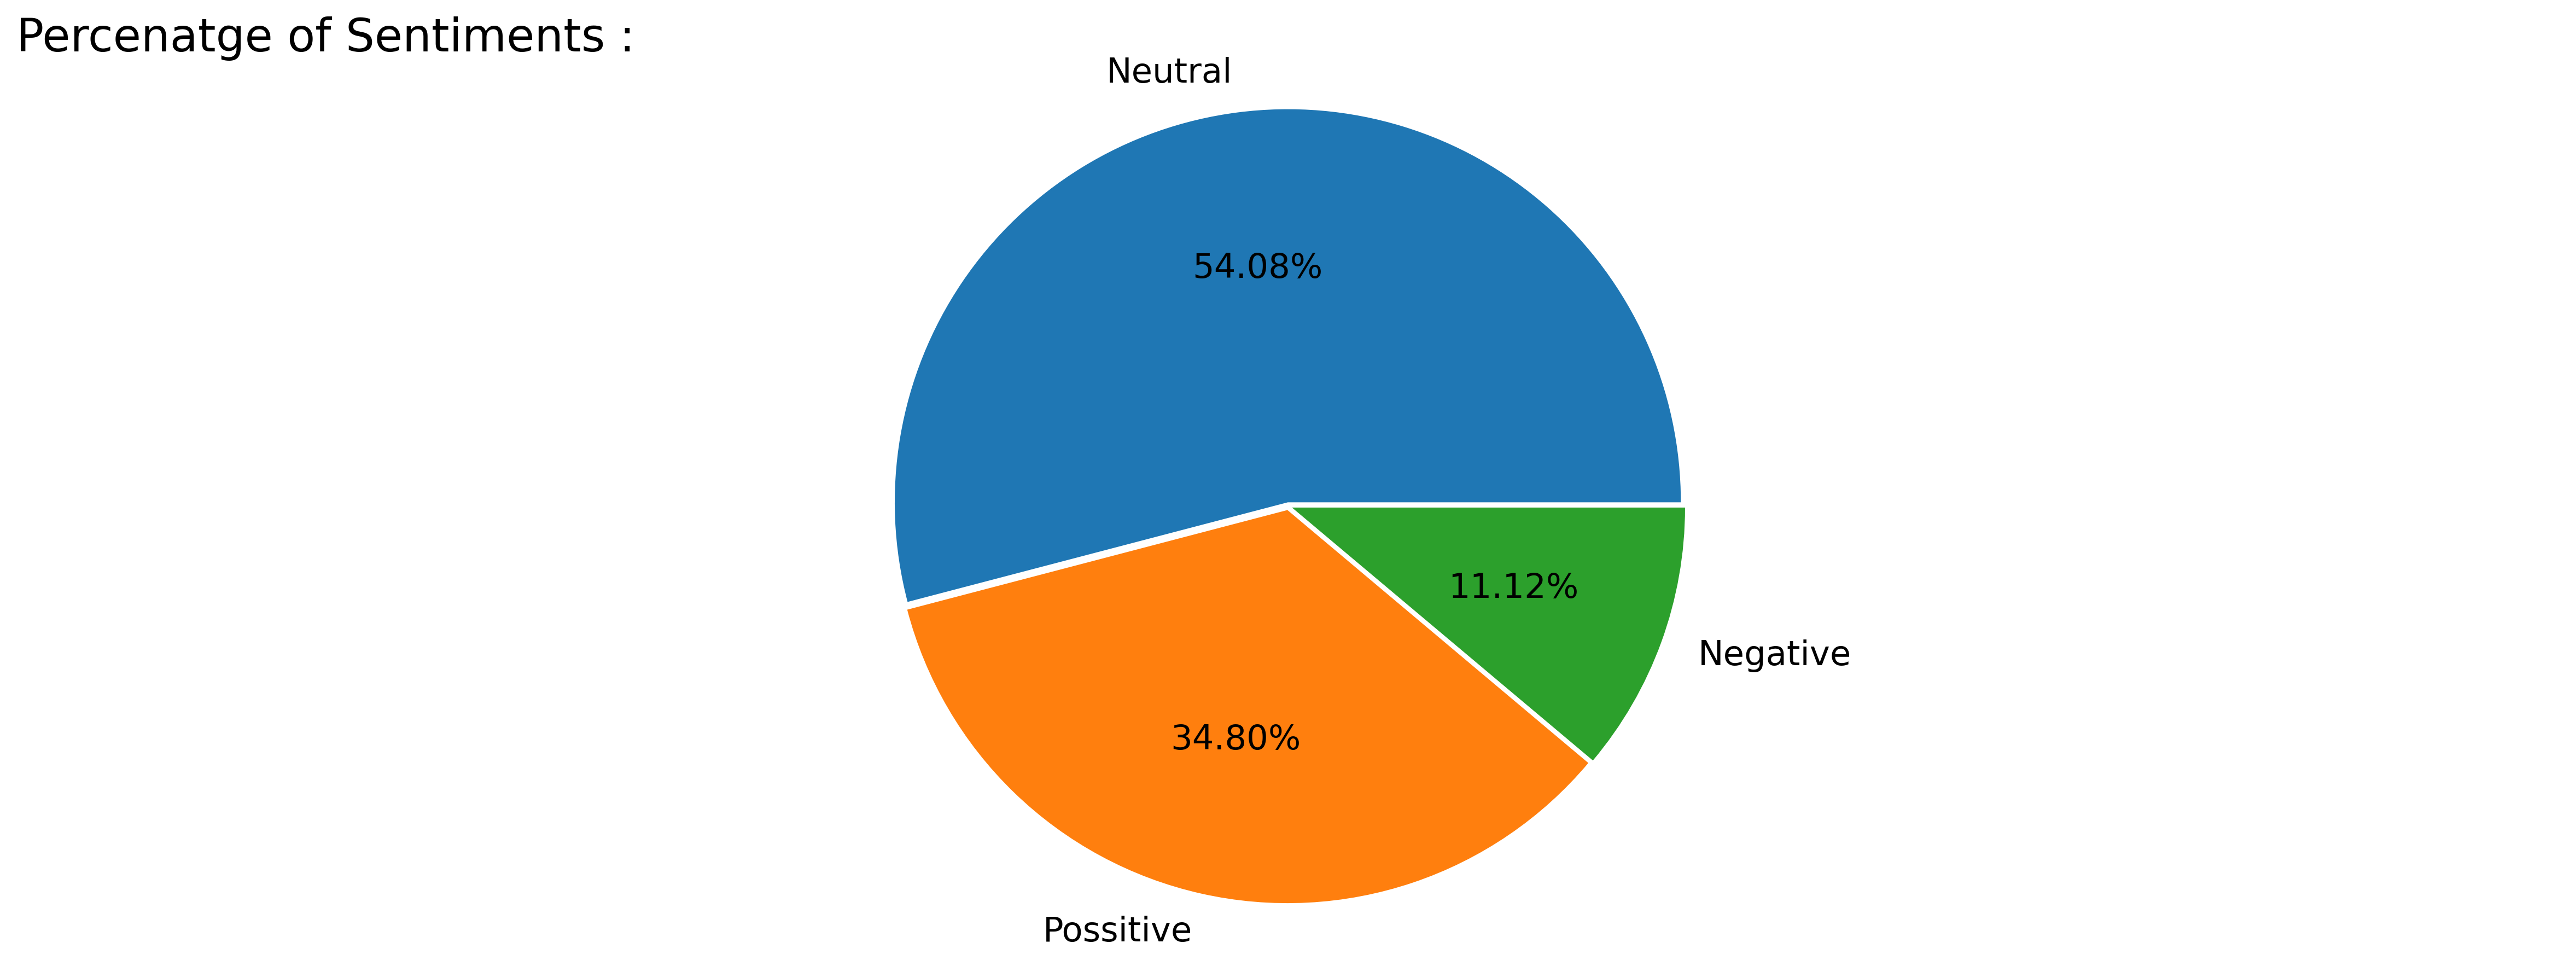

In [14]:
plt.figure(figsize=(20,7), dpi=300)

plt.pie(df['Sentiment'].value_counts(),
        labels = ['Neutral','Possitive','Negative'],
        explode = (0.01,0.01,0.01), # Explode each slice of sentiment
        autopct = '%1.2f%%', # Displaying the pecentage of each sentiment
        textprops = dict(color='black', size=15))
plt.axis('equal')
plt.title("Percenatge of Sentiments :", loc='left', color='black', fontsize='20')
# plt.savefig('Image/Pie_Chart.png', dpi=300)
plt.show()

**In above pie chart :** 
- *The `Neutral` sentiments are `54.08%` presents in Financial analysis data.*
- *The `Positive` sentiments are `34.80%` presents in Financial analysis data.*
- *The `Negative` sentiments are `11.12%` presents in Financial analysis data.*

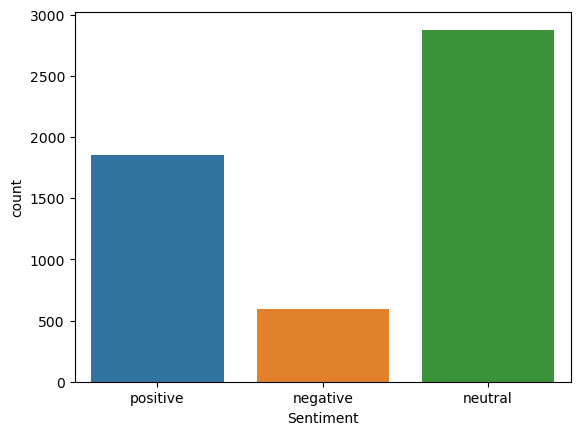

In [15]:
# Countplot of sentiments 
sns.countplot(data=df, x=df['Sentiment'])
plt.show()

In [16]:
# Target variable value count
df.Sentiment.value_counts()

neutral     2878
positive    1852
negative     592
Name: Sentiment, dtype: int64

In [17]:
# Computing length of each sentence & create length column
df['Length'] = df.Sentence.apply(len)
df.head()

Sentence Sentiment  Length
0  The GeoSolutions technology will leverage Bene...  positive     218
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative      55
2  For the last quarter of 2010 , Componenta 's n...  positive     193
3  According to the Finnish-Russian Chamber of Co...   neutral     128
4  The Swedish buyout firm has sold its remaining...   neutral     135

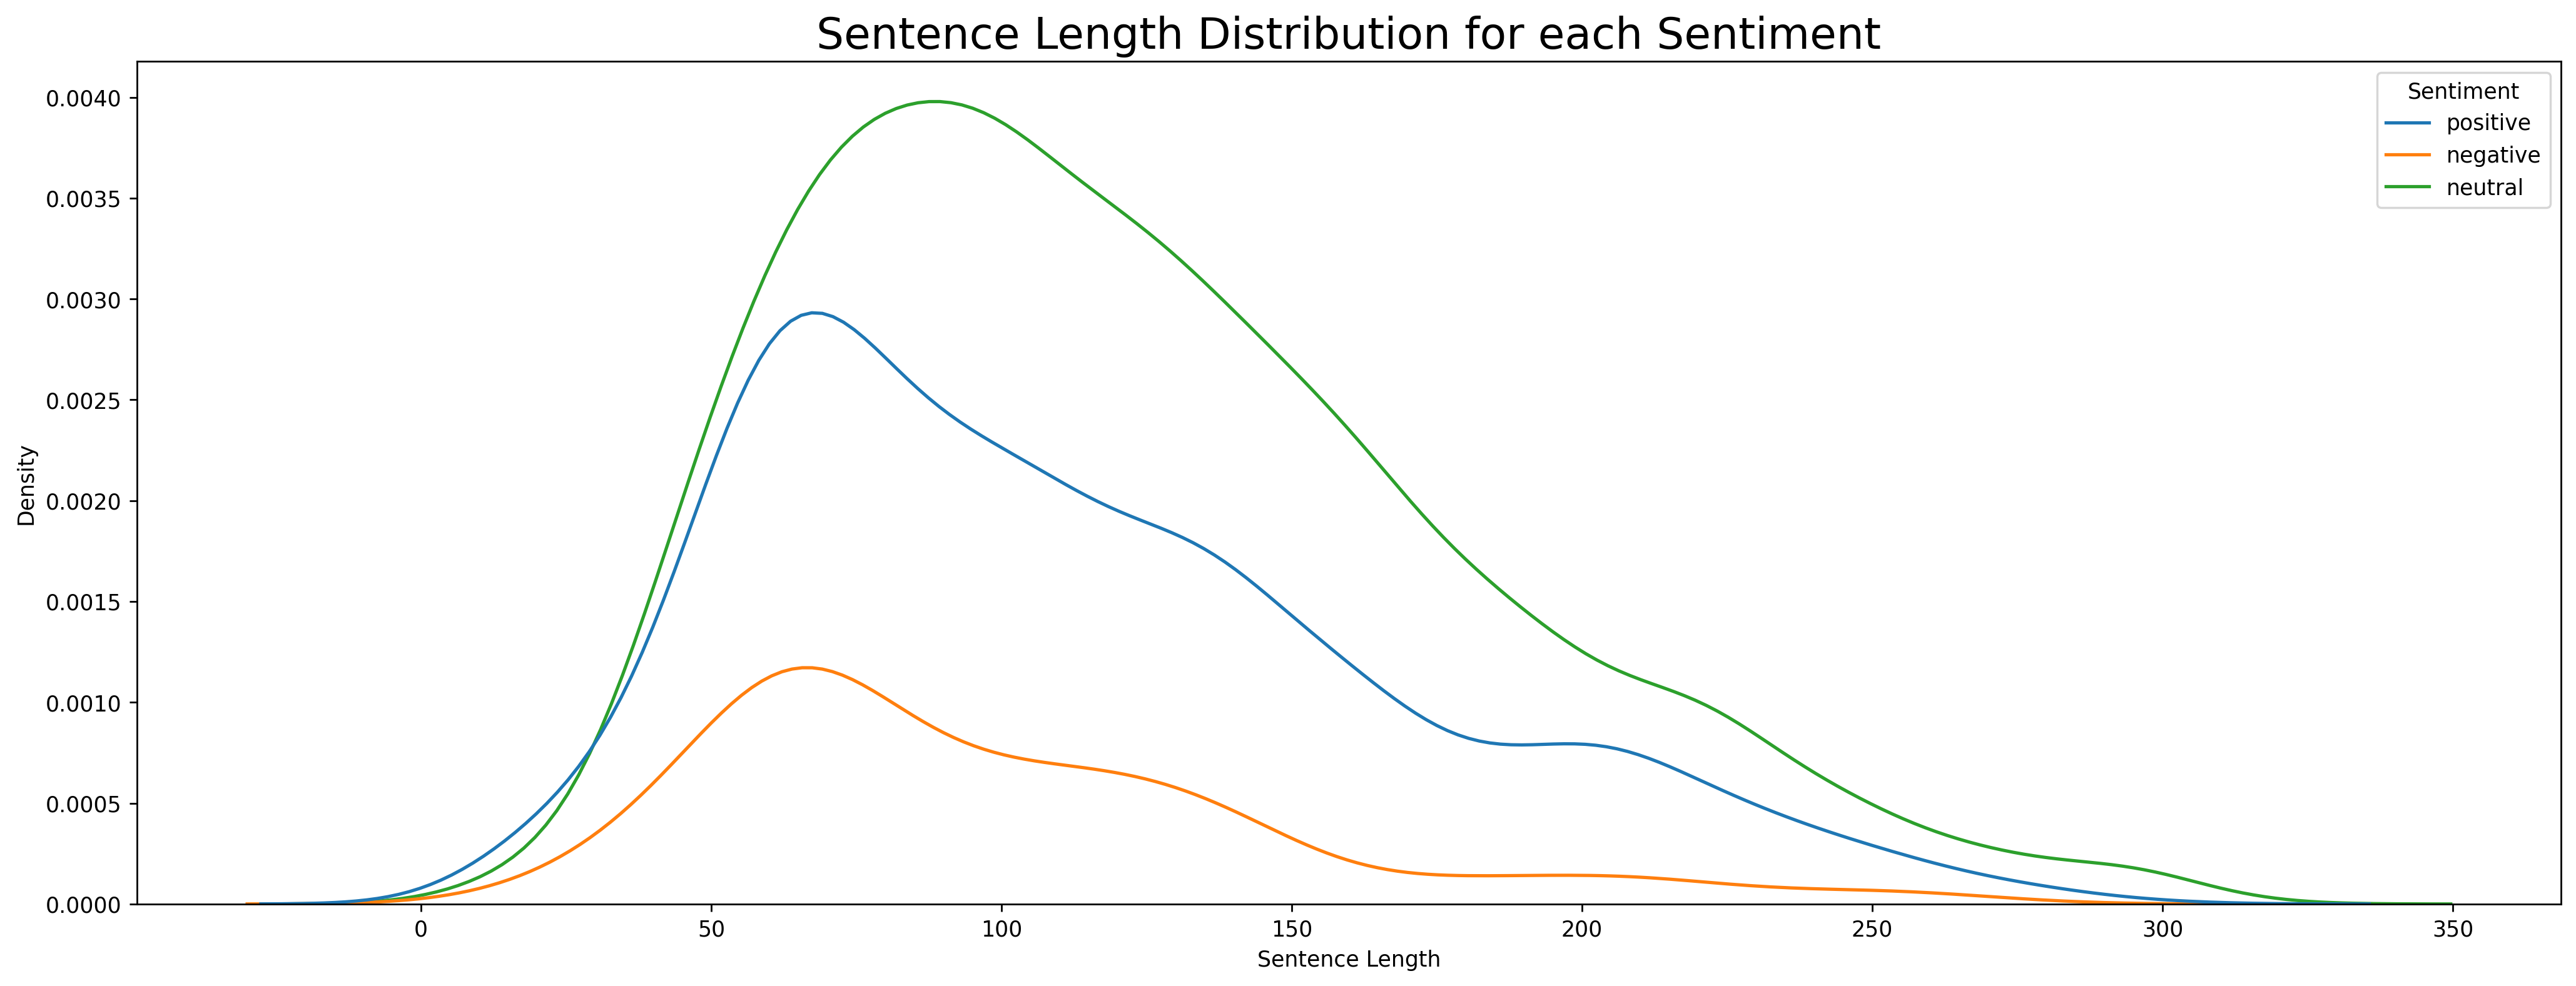

In [18]:
# Visualize the length column
plt.figure(figsize=(20,7),dpi=250)
sns.kdeplot(data=df, x='Length', hue='Sentiment')
plt.title('Sentence Length Distribution for each Sentiment', loc='center', fontdict={'fontsize':20})
plt.xlabel('Sentence Length')
plt.show()

## Language detection :
- *We use `detect_langs` from `langdetect` library for detect language of the sentences.*
- *This library supports 55 languages.*

In [19]:
sentence = list(df['Sentence']) # Convert "Sentence" column into list
languages = [] # Empty list to store detected languages 

# Create loop for detecting languages & append this to "languages" list
for i in range(len(sentence)):
    languages.append(detect_langs(sentence[i]))

In [20]:
# Converting the lang to string.splitting with this & calling the first element
languages = [str(lang).split(':')[0][1:] for lang in languages] 

# Adding languages to dataframe
df['Language'] = languages

# Value counts for each language
print(df['Language'].value_counts())

en    5213
tl      16
fr      15
ca      13
de      13
nl       8
no       8
it       7
af       7
da       6
sv       5
so       3
vi       2
et       2
pt       1
es       1
cy       1
pl       1
Name: Language, dtype: int64


- *Detected `16 languages`.*
- *`English` language having high majority.*

# Text Preprocessing :

In [21]:
# Droping the unimportant columns
df.drop(columns=['Length','Language'], inplace=True)

In [22]:
# Creating a WordNetLemmatizer object
lemma = WordNetLemmatizer()

In [23]:
# Function to remove HTML tags
def removeHTMLTags(sentence):
    soup = BeautifulSoup(sentence, 'lxml')
    return soup.get_text()

In [24]:
# Function to remove apostrophes
def removeApostrophe(sentence):
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"can\'t", "can not", sentence)
    sentence = re.sub(r"n\'t", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'s", " is", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'t", " not", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    return sentence

In [25]:
# Function to remove alphanumeric words
def removeAlphaNumericWords(sentence):
     return re.sub("\S*\d\S*", "", sentence).strip()

In [26]:
# Function to clean a sentence
def doTextCleaning(sentence):
    sentence = removeHTMLTags(sentence)
    sentence = removeApostrophe(sentence)
    sentence = removeAlphaNumericWords(sentence)
    sentence = re.sub('[^a-zA-Z]', ' ', df['Sentence'].iloc[i]) # Remove all characters except alphabets
    sentence = sentence.lower() # Convert all characters into lower case
    sentence = sentence.split() # Split the sentence into words
    sentence = [lemma.lemmatize(word) for word in sentence if word not in stopwords.words('english')] # Lemmatize each word & remove stop words
    sentence = ' '.join(sentence) # Join the words to form a sentence
    return sentence

In [27]:
# Creating an empty list to store cleaned sentences
corpus = []

# Loop through each row of the dataframe
for i in range(len(df)):
    sentence = df['Sentence'].iloc[i] # Get the sentence from the dataframe
    sentence = doTextCleaning(sentence) # Clean the sentence
    corpus.append(sentence) # Append the cleaned sentence to the corpus list

In [28]:
# Showing cleane sentences
corpus

['geosolutions technology leverage benefon gps solution providing location based search technology community platform location relevant multimedia content new powerful commercial model',
 'esi low bk real possibility',
 'last quarter componenta net sale doubled eur eur period year earlier moved zero pre tax profit pre tax loss eur',
 'according finnish russian chamber commerce major construction company finland operating russia',
 'swedish buyout firm sold remaining percent stake almost eighteen month taking company public finland',
 'spy surprised see green close',
 'shell billion bg deal meet shareholder skepticism',
 'ssh communication security corp stock exchange release october pm company update full year outlook estimate result remain loss full year',
 'kone net sale rose year year first nine month',
 'stockmann department store total floor space square metre stockmann investment project price tag eur million',
 'circulation revenue increased finland sweden',
 'sap q disappoints 

## Named Entity Recognition :

In [29]:
spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm')
nlp.pipe_names

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [30]:
sample = corpus[12]
sample

'subdivision made sale revenue last year eur million eur million operating profit eur million eur million'

In [31]:
sample_1 = nlp(sample)
sample_1

subdivision made sale revenue last year eur million eur million operating profit eur million eur million

In [32]:
displacy.render(sample_1, style='ent')

In [33]:
txt = ' '.join(corpus)
x = nlp(txt)
displacy.render(x, style='ent')

In [34]:
for i in x.ents:
    print(i, '|', i.label_)

last quarter | DATE
componenta net | ORG
period year earlier | DATE
zero | CARDINAL
russian | NORP
finland | GPE
russia | GPE
swedish | NORP
almost eighteen month | DATE
billion | CARDINAL
ssh communication security corp stock exchange | ORG
october | DATE
full year | DATE
year year first nine month | DATE
finland | GPE
last year | DATE
eur million eur million | CARDINAL
sql | ORG
nnen tehtaat | ORG
nasdaq omx helsinki | PERSON
nasdaq omx helsinki ltd two | ORG
billion pound | QUANTITY
several dozen | CARDINAL
last year | DATE
four million | CARDINAL
cnh | ORG
five | CARDINAL
storey eco | PERSON
first | ORDINAL
dozen | CARDINAL
swedish | NORP
september | DATE
whereby stockmann | ORG
september | DATE
finnish | NORP
cramo | ORG
million | CARDINAL
dutch | NORP
nearly billion financialwire | MONEY
swedish | NORP
assa abloy ab | ORG
year earlier | DATE
afternoon | TIME
gabbana | ORG
european union declare marimekko corporation | ORG
two | CARDINAL
first quarter | DATE
two | CARDINAL
third |

In [35]:
# Extract entity labels
labels = [i.label_ for i in x.ents]

# Count occurrences of each label
label_counts = Counter(labels)

# Create pandas DataFrame with columns 'Label' and 'Count'
entity_df = pd.DataFrame({'Label': label_counts.keys(), 'Count': label_counts.values()})

# Showing the sorted dataframe
entity_df.sort_values('Count', ascending=False)

Label  Count
0       DATE   1578
1        ORG    960
4        GPE    714
5     PERSON    573
2   CARDINAL    461
3       NORP    348
7    ORDINAL    131
11       LOC     93
10       LAW     36
6   QUANTITY     31
9       TIME     30
8      MONEY     26
15       FAC     16
12   PRODUCT     15
14   PERCENT      7
13     EVENT      6
16  LANGUAGE      2

In [36]:
# Replacing uncleaned sentences with cleaned sentences
df['Sentence'] = corpus
df.head()

Sentence Sentiment
0  geosolutions technology leverage benefon gps s...  positive
1                        esi low bk real possibility  negative
2  last quarter componenta net sale doubled eur e...  positive
3  according finnish russian chamber commerce maj...   neutral
4  swedish buyout firm sold remaining percent sta...   neutral

# Wordcloud :

In [37]:
# Define the sentiments for ploting wordcloud plot
neutral = df[df.Sentiment=='neutral']
positive = df[df.Sentiment=='positive']
negative = df[df.Sentiment=='negative']

In [38]:
df['Label']= df['Sentiment'].map({'negative':0, 'neutral':1, 'positive':2})
df.head()

Sentence Sentiment  Label
0  geosolutions technology leverage benefon gps s...  positive      2
1                        esi low bk real possibility  negative      0
2  last quarter componenta net sale doubled eur e...  positive      2
3  according finnish russian chamber commerce maj...   neutral      1
4  swedish buyout firm sold remaining percent sta...   neutral      1

In [39]:
# Creating function to generate wordcloud
def wordcloud(data,title,size=(10,5),dpi=250):
    txt = ' '.join(data['Sentence']) # Joins "Sentence" column into a single string
    stop = STOPWORDS # Define stopwords
    # Creating object for WordCloud() & generate word cloud
    wc = WordCloud(background_color='white',stopwords=stop,max_words=100).generate(txt)
    plt.figure(figsize=size,dpi=dpi)
    plt.imshow(wc) # Display the word cloud
    plt.axis('off') # Turn off x & y axis
    plt.title(title,size = 20)

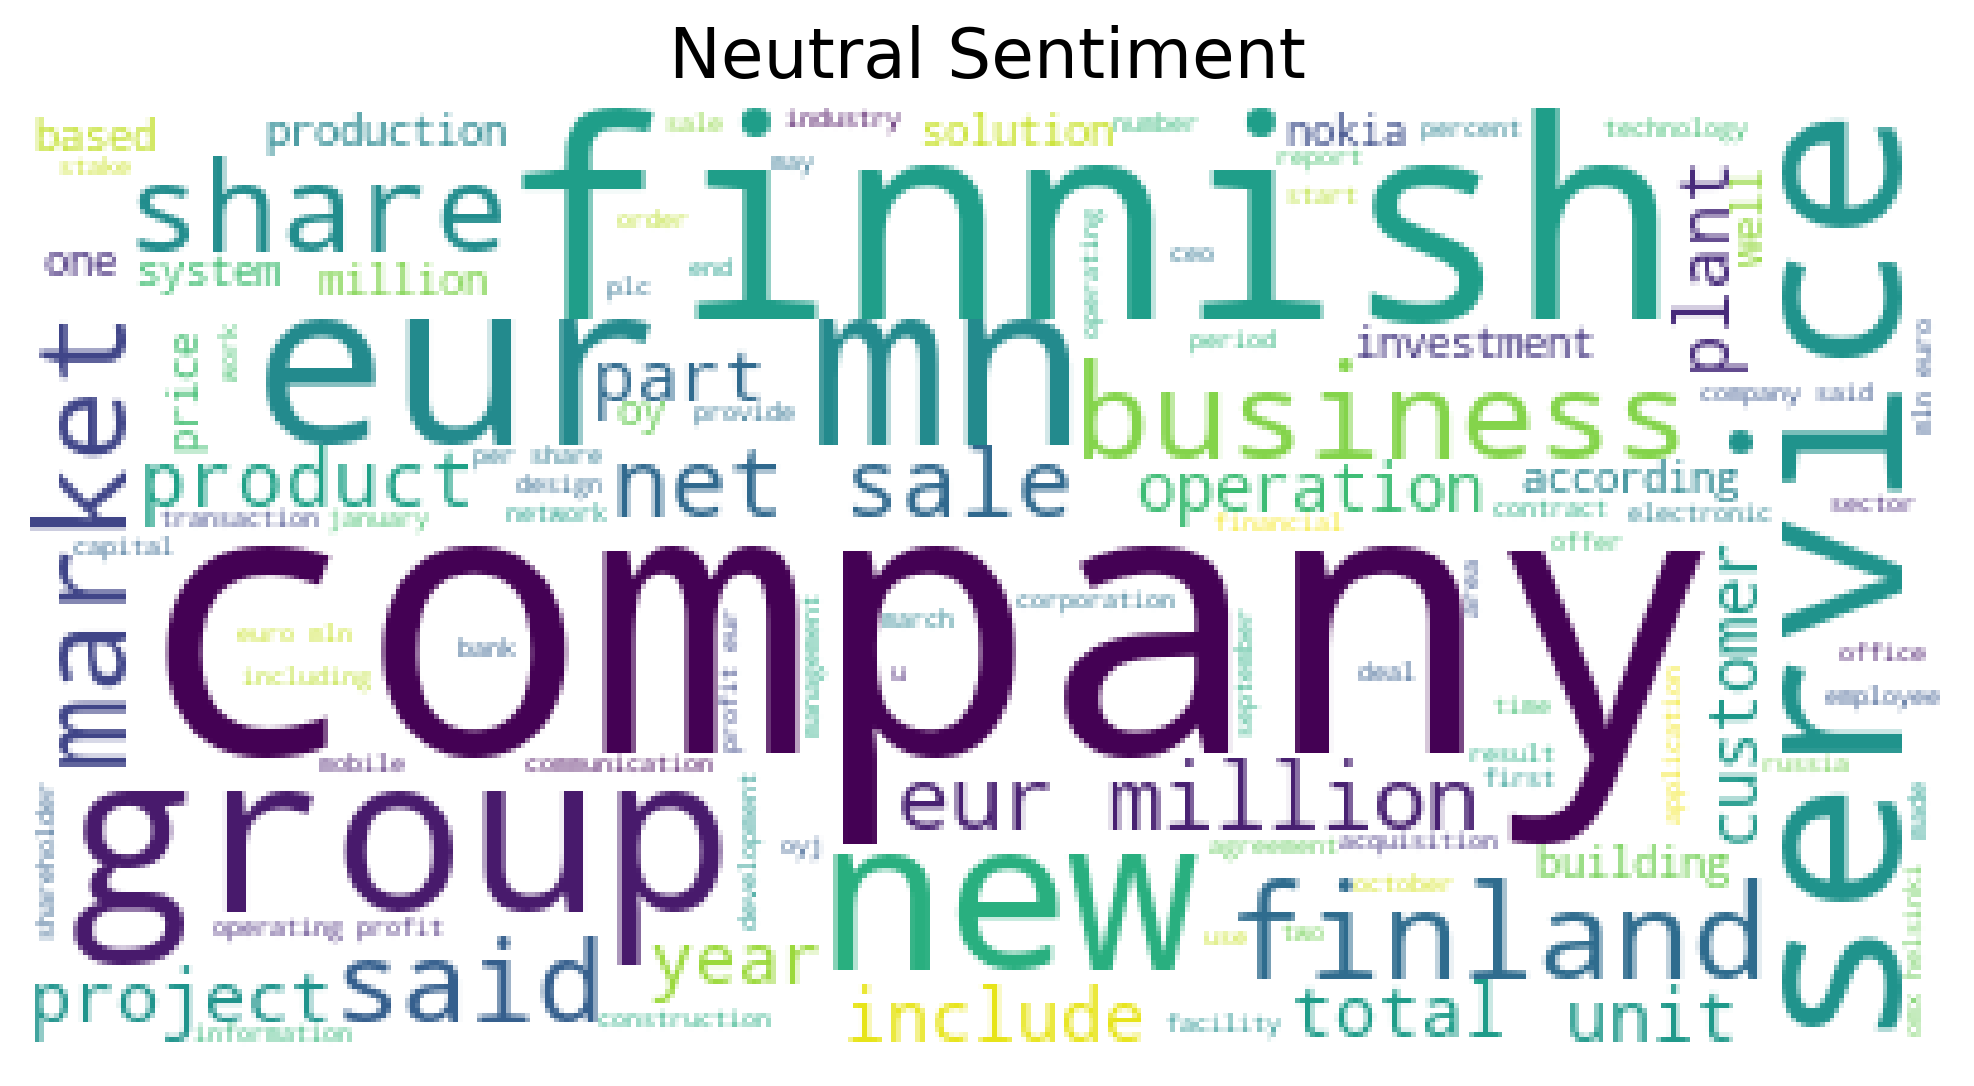

In [40]:
# Wordcloud for neutral sentiments
wordcloud(neutral,"Neutral Sentiment")

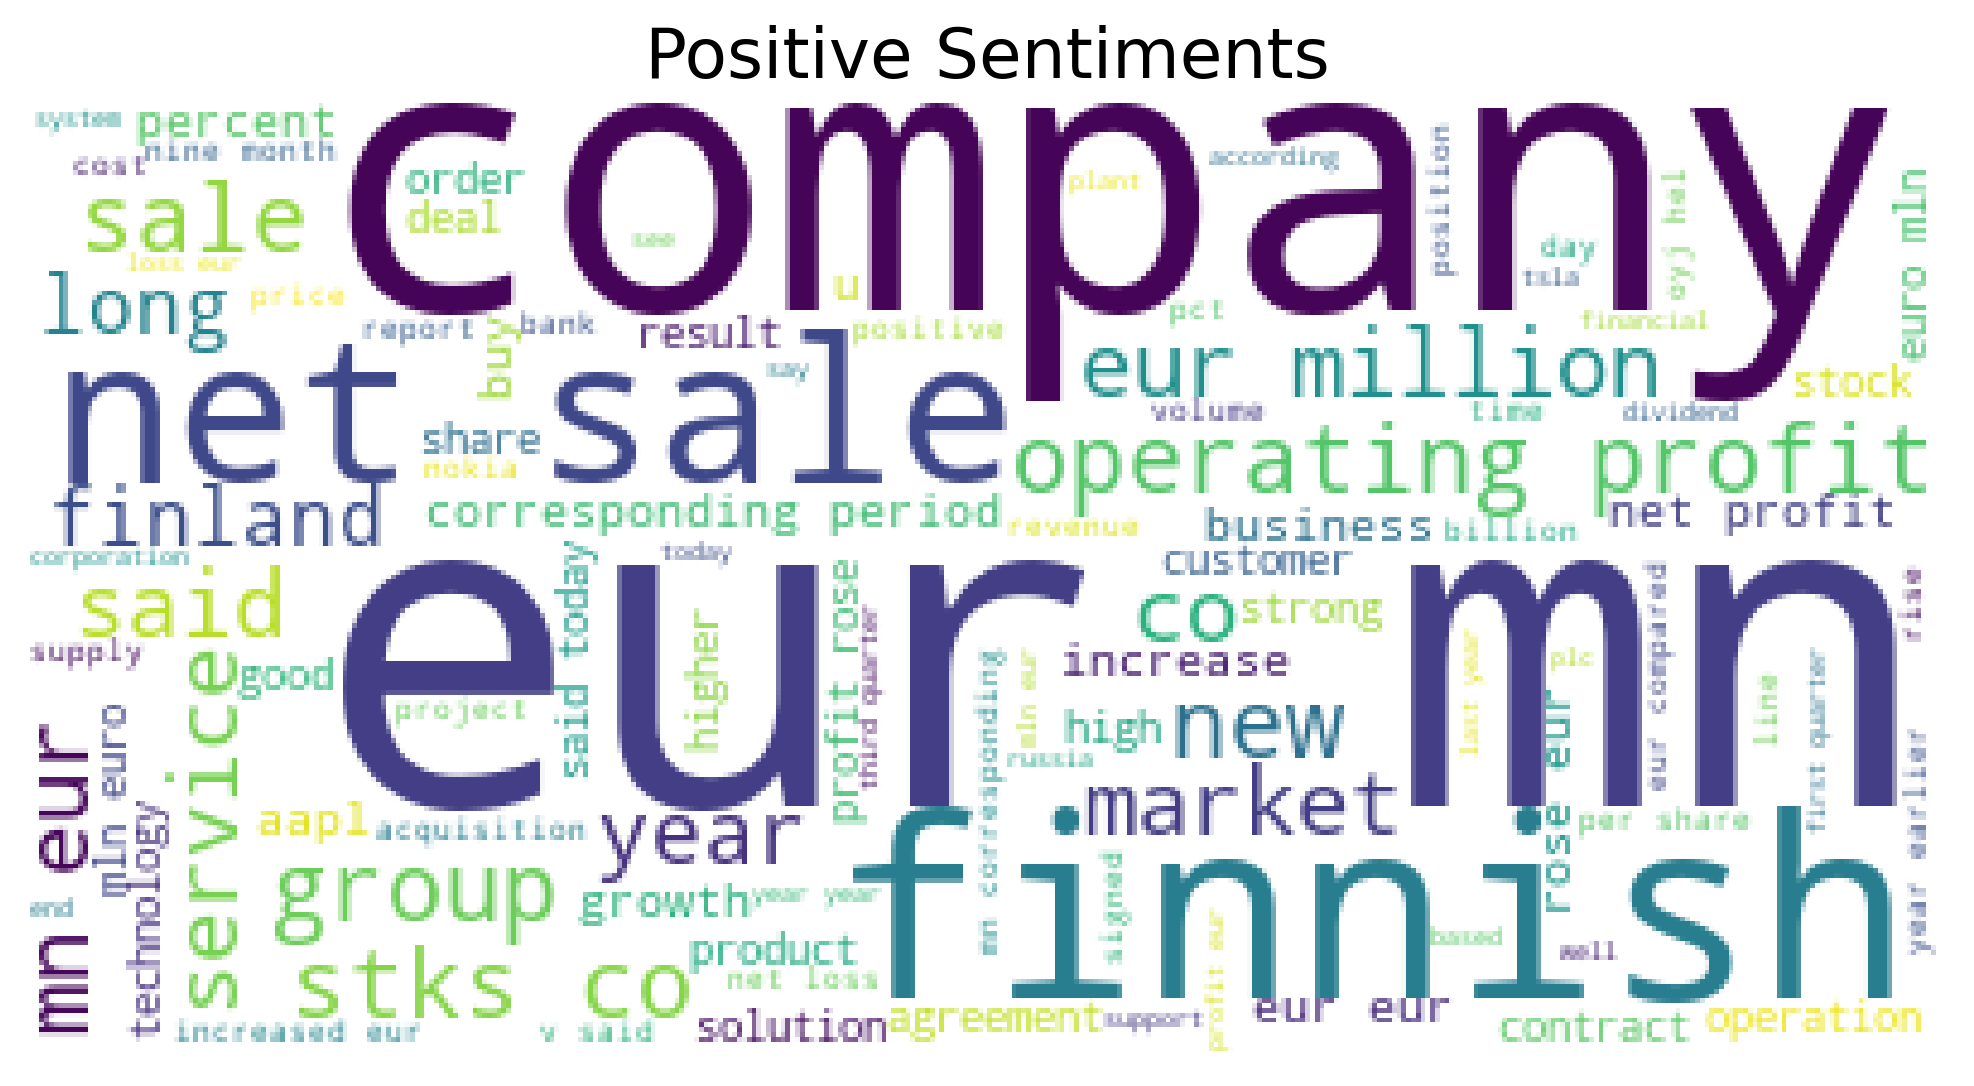

In [41]:
# Wordcloud for positive sentiments
wordcloud(positive, "Positive Sentiments")

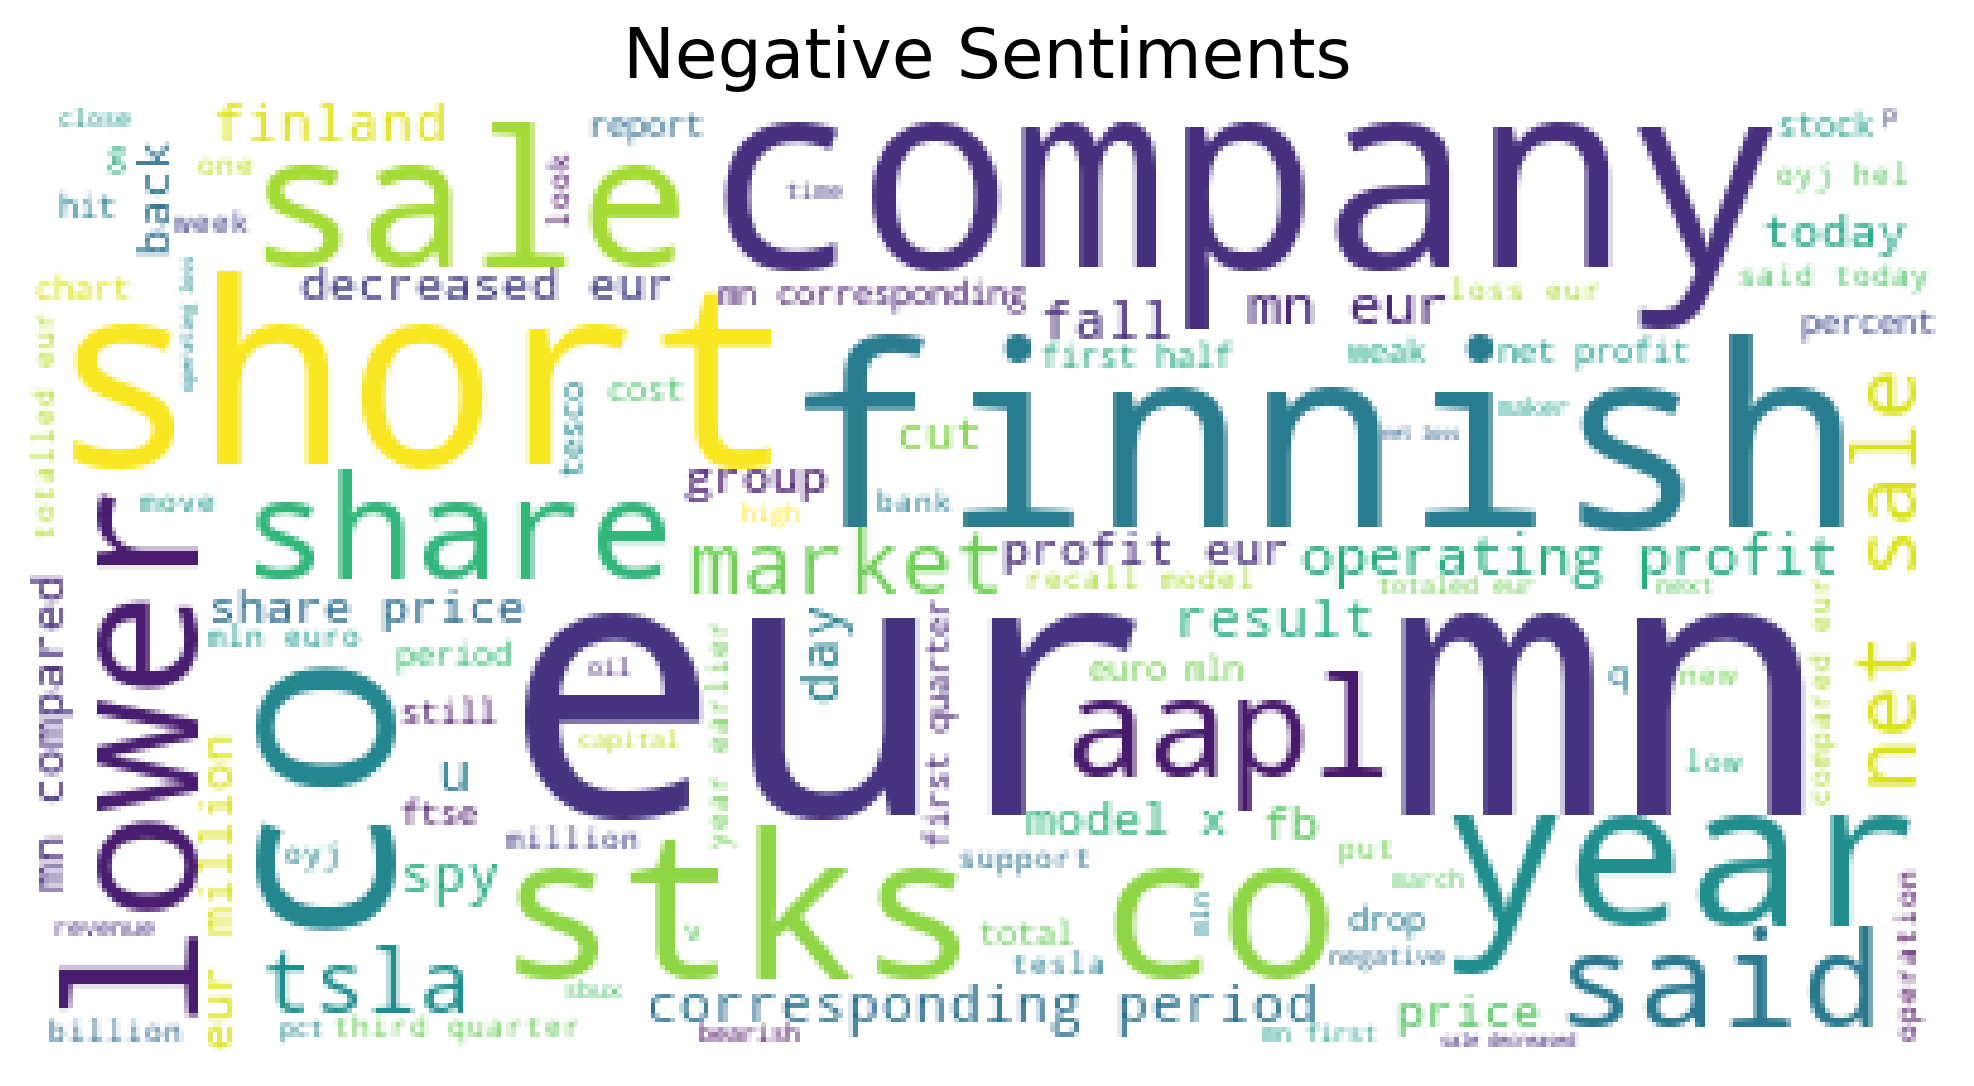

In [42]:
# Wordcloud for positive sentiments
wordcloud(negative, "Negative Sentiments")

# Polarity :

In [43]:
# Creating object for SentimentIntensityAnalyzer()
analyzer = SentimentIntensityAnalyzer()

# Adding new column 'Polarity_vader' to 'df' that contains sentiment polarity scores computed by the VADER Sentiment Analyzer.
df['Polarity_vader']= df['Sentence'].map(lambda txt: analyzer.polarity_scores(txt))

# Adding new column 'Polarity' to 'df' that contains sentiment polarity scores computed by the TextBlob library.
df["Polarity"] = df["Sentence"].map(lambda txt: TextBlob(txt).sentiment.polarity)

df.head()

Sentence Sentiment  Label  \
0  geosolutions technology leverage benefon gps s...  positive      2   
1                        esi low bk real possibility  negative      0   
2  last quarter componenta net sale doubled eur e...  positive      2   
3  according finnish russian chamber commerce maj...   neutral      1   
4  swedish buyout firm sold remaining percent sta...   neutral      1   

                                      Polarity_vader  Polarity  
0  {'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp...  0.209091  
1  {'neg': 0.344, 'neu': 0.656, 'pos': 0.0, 'comp...  0.100000  
2  {'neg': 0.099, 'neu': 0.776, 'pos': 0.125, 'co...  0.000000  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.031250  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound... -0.100000

Text(0.5, 1.0, 'Polarity Score')

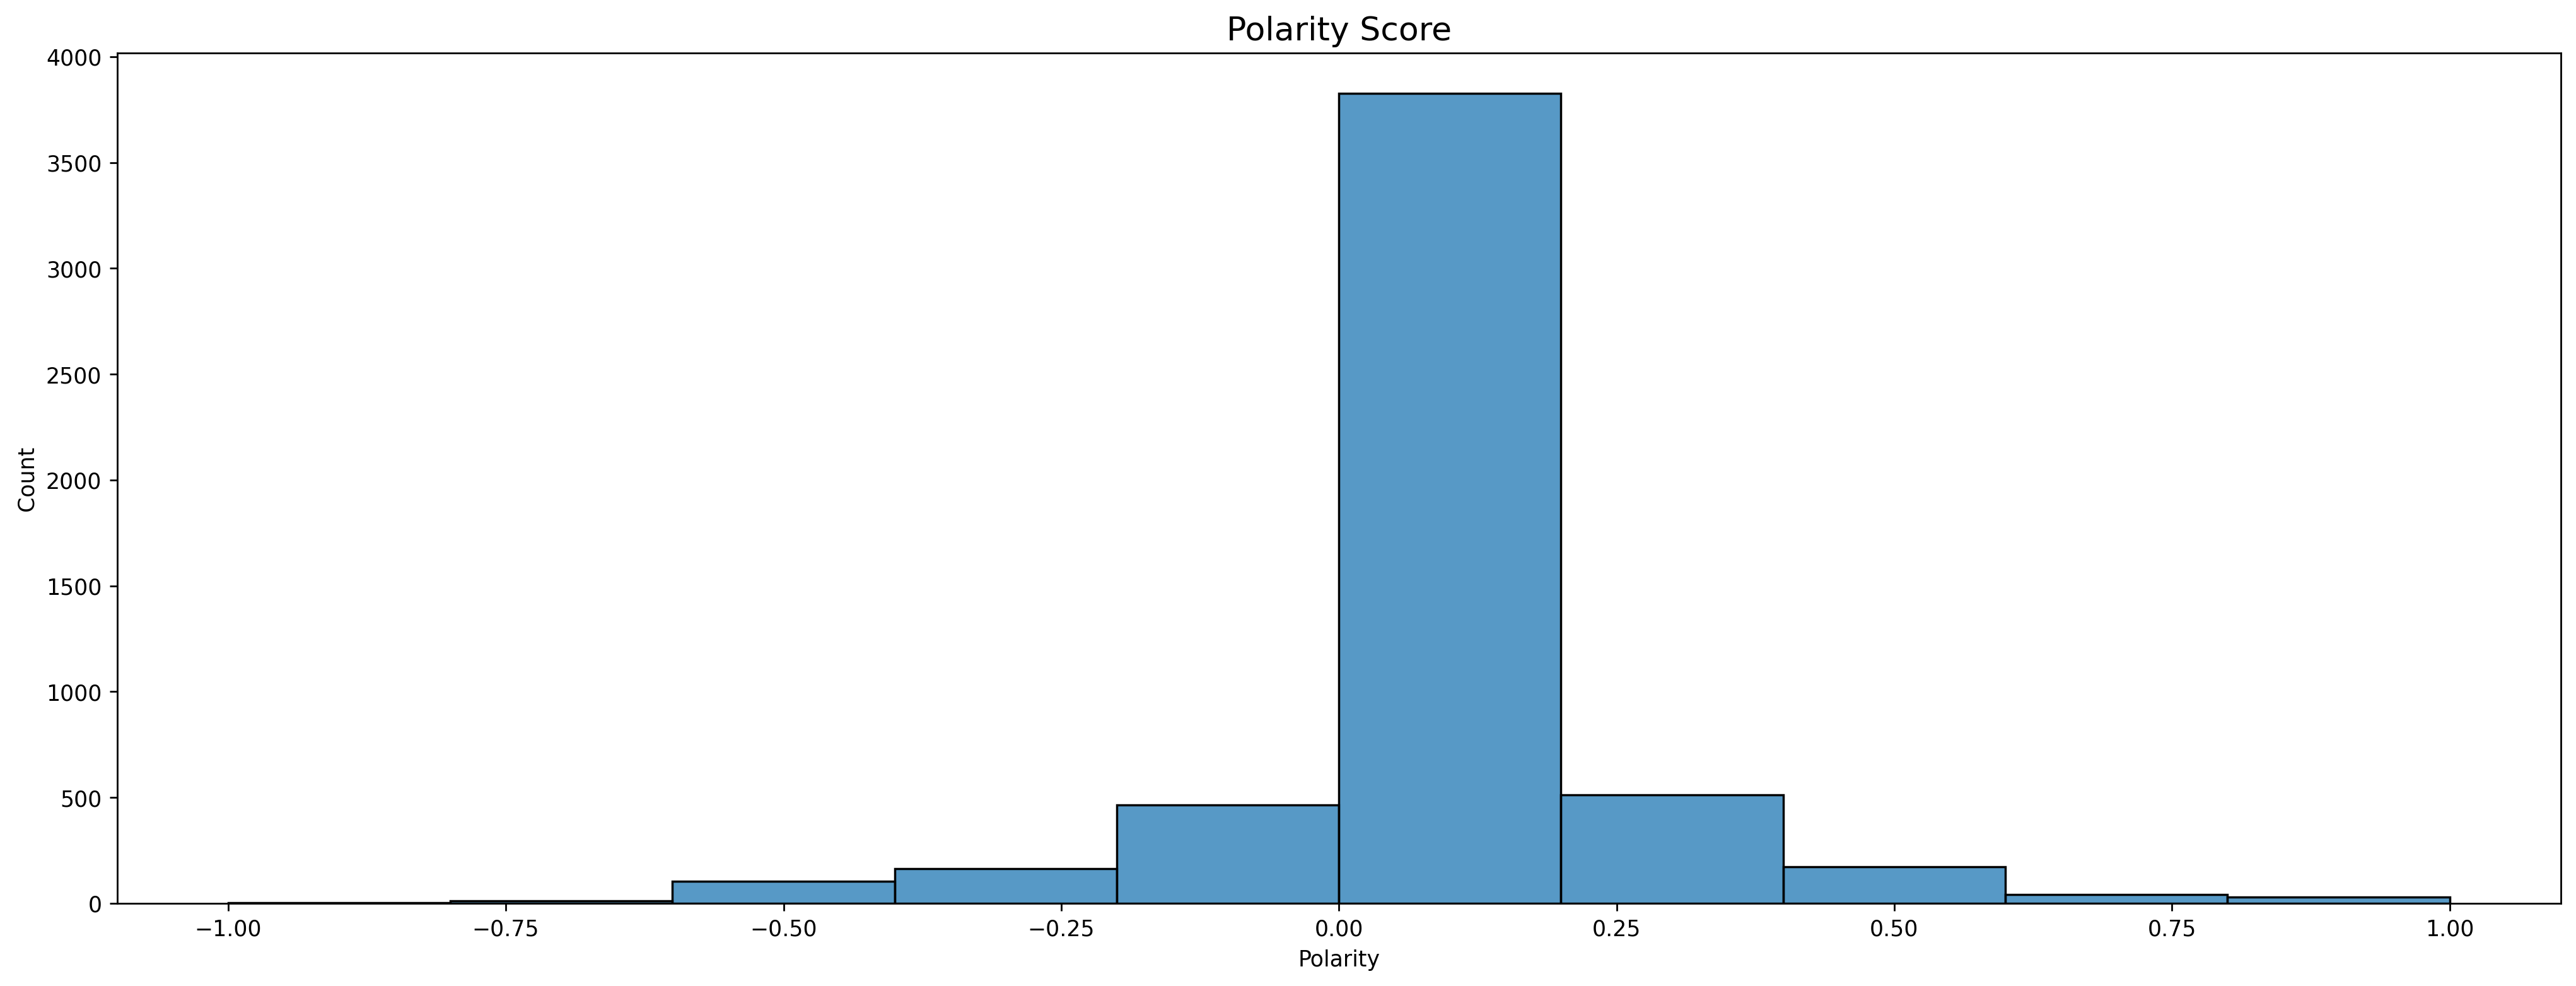

In [44]:
# Polarity score
plt.figure(figsize=(20,7),dpi=250)
sns.histplot(data=df, x='Polarity', bins=10)
plt.title('Polarity Score', size=15)

# Frequency :

In [45]:
freq_whole = pd.Series(' '.join(df['Sentence']).split()).value_counts()[0:200] # Top 50 words
freq_positive = pd.Series(' '.join(positive['Sentence']).split()).value_counts()[0:200] #top 50 words
freq_negative = pd.Series(' '.join(negative['Sentence']).split()).value_counts()[0:200] #top 50 words
freq_neutral = pd.Series(' '.join(neutral['Sentence']).split()).value_counts()[0:200] #top 50 words

In [46]:
# Saving in .csv format
freq_whole.to_csv('whole.csv')
freq_positive.to_csv('positive.csv')
freq_negative.to_csv('negative.csv')
freq_neutral.to_csv('neutral.csv')

In [47]:
# Read the first Excel file into a DataFrame
df1 = pd.read_csv('positive.csv')

# Read the second Excel file into a DataFrame
df2 = pd.read_csv('negative.csv')

# Read the second Excel file into a DataFrame
df3 = pd.read_csv('neutral.csv')

# Concatenate the two DataFrames column-wise
result = pd.concat([df1, df2, df3], axis=1)

# Write the result to a new Excel file
result.to_excel('output.xlsx', index=False)

In [48]:
# Load the Excel file into a DataFrame
data = pd.read_excel('output.xlsx')

# Get a list of column names
column_names = list(data.columns)

# Add a prefix to duplicate column names
unique_column_names = []
for name in column_names:
    if name in unique_column_names:
        unique_column_names.append(name + '_new')
    else:
        unique_column_names.append(name)
data.columns = unique_column_names

# Save the modified DataFrame to a new Excel file
data.to_excel('modified.xlsx', index=False)

# Comman Words :

In [49]:
# Read the Excel file into a DataFrame
data = pd.read_excel('modified.xlsx')

# Find common words between two columns
common_words = set(data['Unnamed: 0']).intersection(set(data['Unnamed: 0.1']), set(data['Unnamed: 0.2']))

# Print the common words
print(common_words)

{'dividend', 'expected', 'total', 'second', 'percent', 'period', 'bank', 'year', 'finnish', 'million', 'finland', 'quarter', 'euro', 'management', 'sell', 'oyj', 'time', 'billion', 'result', 'january', 'today', 'profit', 'sale', 'revenue', 'capital', 'month', 'also', 'said', 'however', 'plan', 'eur', 'operating', 'high', 'new', 'may', 'term', 'u', 'price', 'last', 'mn', 'product', 'report', 'september', 'system', 'compared', 'one', 'operation', 'mln', 'first', 'third', 'per', 'group', 'stock', 'share', 'company', 'net', 'usd', 'earlier', 'hel', 'omx', 'unit', 'market', 'contract', 'loss', 'helsinki', 'pct', 'v'}


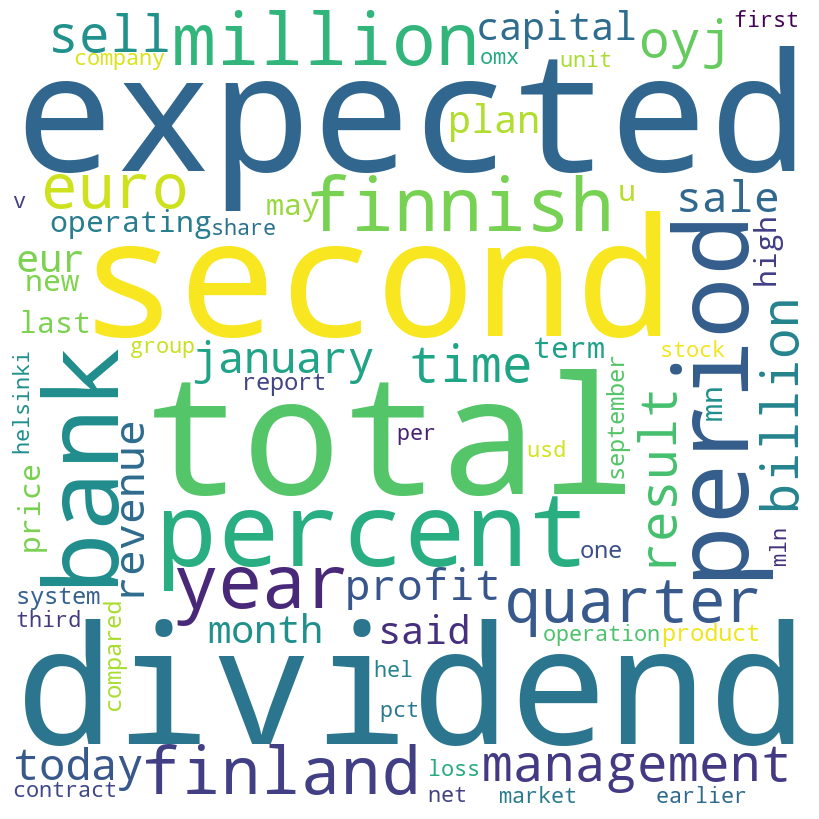

In [50]:
# common_words 
# Create a string of the unique_words
common_text = ' '.join(common_words)

# Create a word cloud of the unique words
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(common_text)

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Unique Words :

In [51]:
# Read the Excel file into a DataFrame
data = pd.read_excel('modified.xlsx')

# Find the unique words in each column
col1_words = set(data['Unnamed: 0'])
col2_words = set(data['Unnamed: 0.1'])
col3_words = set(data['Unnamed: 0.2'])

In [52]:
# Find the unique words in the first two columns
diff = col1_words - col2_words - col3_words
print(diff)

{'run', 'significant', 'aim', 'grew', 'good', 'bullish', 'respectively', 'uk', 'long', 'ago', 'double', 'strong', 'rise', 'three', 'awarded', 'metal', 'supply', 'higher', 'cooperation', 'eps', 'sabmiller', 'breakout', 'call', 'target', 'strategy', 'rose', 'growth', 'narrowed', 'looking', 'february', 'signed', 'positive', 'volume', 'provider', 'estimated', 'nine', 'increased', 'buy', 'b', 'china', 'drug', 'expects', 'improved', 'increase', 'beer', 'steel', 'yesterday', 'position', 'demand', 'insurance', 'head', 'saving', 'ab', 'versus'}


In [53]:
# Create a string of the unique_words
unique_text = ' '.join(diff)

# Create a word cloud of the unique words
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(unique_text)

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# N-grams :
## Unigrams :

In [54]:
# Unigram words
def get_top_n1_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(1,1),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [55]:
top_words = get_top_n1_words(df["Sentence"], n=200) #top 200
top_df = pd.DataFrame(top_words)
top_df.columns=["Uni-gram", "Freq"]
top_df.head()

Uni-gram  Freq
0      eur  1344
1  company   830
2       mn   588
3     sale   517
4    share   473

In [56]:
top_df["Polarity"] = top_df["Uni-gram"].map(lambda txt: TextBlob(txt).sentiment.polarity)
top_df

Uni-gram  Freq  Polarity
0           eur  1344       0.0
1       company   830       0.0
2            mn   588       0.0
3          sale   517       0.0
4         share   473       0.0
..          ...   ...       ...
195  subsidiary    47       0.0
196         eps    47       0.0
197       brand    47       0.0
198        next    47       0.0
199        back    47       0.0

[200 rows x 3 columns]

In [57]:
def getanalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [58]:
'''Adding new column 'Sentiment' to the DataFrame 'top_df' that contains sentiment analysis results computed by
 the 'getanalysis' function, applied to the 'Polarity' column.'''
top_df['Sentiment']= top_df['Polarity'].apply(getanalysis)

'''Adding new column 'Label' to the DataFrame 'top_df' that maps the sentiment labels 'Negative', 'Neutral' & 'Positive' 
to numerical values 0, 1, and 2, respectively.'''
top_df['Label']= top_df['Sentiment'].map({'Negative':0,  'Neutral':1, 'Positive':2})

top_df.head()

Uni-gram  Freq  Polarity Sentiment  Label
0      eur  1344       0.0   Neutral      1
1  company   830       0.0   Neutral      1
2       mn   588       0.0   Neutral      1
3     sale   517       0.0   Neutral      1
4    share   473       0.0   Neutral      1

## Bigrams : 

In [59]:
# Bigram words
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [60]:
top2_words = get_top_n2_words(df["Sentence"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

Bi-gram  Freq
0            eur mn   550
1          net sale   232
2       eur million   204
3  operating profit   188
4            mn eur   141

In [61]:
'''Adding new column 'Polarity' to the DataFrame 'top2_df' that contains sentiment polarity scores computed by the
TextBlob library, applied to the 'Bi-gram' column.'''
top2_df["Polarity"] = top2_df["Bi-gram"].map(lambda txt: TextBlob(txt).sentiment.polarity)

'''Adding new column 'Sentiment' to the DataFrame 'top2_df' that contains sentiment analysis results computed by the
'getanalysis' function, applied to the 'Polarity' column.'''
top2_df['Sentiment']= top2_df['Polarity'].apply(getanalysis)

'''Adding new column 'Label' to the DataFrame 'top2_df' that maps the sentiment labels 'Negative', 'Neutral' & 'Positive' 
to numerical values 0, 1, and 2, respectively.'''
top2_df['Label']= top2_df['Sentiment'].map({'Negative':0,  'Neutral':1, 'Positive':2})

top2_df.head()

Bi-gram  Freq  Polarity Sentiment  Label
0            eur mn   550       0.0   Neutral      1
1          net sale   232       0.0   Neutral      1
2       eur million   204       0.0   Neutral      1
3  operating profit   188       0.0   Neutral      1
4            mn eur   141       0.0   Neutral      1

## Trigrams :

In [62]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [63]:
top3_words = get_top_n3_words(df["Sentence"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

Tri-gram  Freq
0                       mn eur mn   139
1                      eur mn eur   137
2                    http stks co   132
3                    mln euro mln    99
4            eur mn corresponding    59
..                            ...   ...
195        listed nordic exchange     6
196      nordic exchange helsinki     6
197                 eur mn profit     6
198  incap contract manufacturing     6
199              loss totaled eur     6

[200 rows x 2 columns]

In [64]:
'''Adding new column 'Polarity' to the DataFrame 'top3_df' that contains sentiment polarity scores computed by the
TextBlob library, applied to the 'Tri-gram' column.'''
top3_df["Polarity"] = top3_df["Tri-gram"].map(lambda txt: TextBlob(txt).sentiment.polarity)

'''# Adds a new column 'Sentiment' to the DataFrame 'top3_df' that contains sentiment analysis results computed by the 
'getanalysis' function, applied to the 'Polarity' column.'''
top3_df['Sentiment']= top3_df['Polarity'].apply(getanalysis)

'''Adding new column 'Label' to the DataFrame 'top3_df' that maps the sentiment labels 'Negative', 'Neutral' & 'Positive'
to numerical values 0, 1, and 2, respectively.'''
top3_df['Label']= top3_df['Sentiment'].map({'Negative':0,  'Neutral':1, 'Positive':2})

top3_df.head()

Tri-gram  Freq  Polarity Sentiment  Label
0             mn eur mn   139       0.0   Neutral      1
1            eur mn eur   137       0.0   Neutral      1
2          http stks co   132       0.0   Neutral      1
3          mln euro mln    99       0.0   Neutral      1
4  eur mn corresponding    59       0.0   Neutral      1

In [65]:
# Saving Ngrams in .csv format
top_df.to_csv('uni.csv')
top2_df.to_csv('bi.csv')
top3_df.to_csv('tri.csv')

## Droping common words :

In [66]:
Stopwords = (set(nltk.corpus.stopwords.words("english")))

Stopwords.remove('not')
Stopwords.remove('down')
Stopwords.remove('more')
Stopwords.remove('under')

In [67]:
domain_words=['system', 'finland', 'today', 'time', 'third', 'news', 'helsinki', 'usd', 'total', 'million', 'bank',
              'report', 'omx', 'mln', 'compared', 'u', 'eur', 'capital', 'eurm', 'first', 'however', 'finnish', 'end', 
              'group', 'profit', 'plan', 'dividend', 'corresponding', 'quarter', 'stock', 'also', 'share', 'management',
              'said', 'last', 'contract', 'operation', 'month', 'oyj', 'billion', 'net', 'second', 'sale', 'new', 
              'operating', 'hel', 'production', 'revenue', 'price', 'would', 'earlier', 'unit', 'loss', 'ceo', 'per',
              'percent', 'product', 'may', 'pct', 'manufacturer', 'one', 'result', 'euro', 'sell', 'oil', 'investment', 
              'mn', 'year', 'period', 'market', 'company', 'oyj']

Stopwords.update(domain_words)

In [68]:
def clean_data(text):
    txt = text.split()
    lemma= WordNetLemmatizer()
    txt = [lemma.lemmatize(i) for i in txt if not i in Stopwords]
    return(" ".join(txt))

#Apply the functions
df['Sentence'] = df['Sentence'].apply(clean_data)

df.head()

Sentence Sentiment  Label  \
0  geosolutions technology leverage benefon gps s...  positive      2   
1                        esi low bk real possibility  negative      0   
2      componenta doubled moved zero pre tax pre tax  positive      2   
3  according russian chamber commerce major const...   neutral      1   
4  swedish buyout firm sold remaining stake almos...   neutral      1   

                                      Polarity_vader  Polarity  
0  {'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp...  0.209091  
1  {'neg': 0.344, 'neu': 0.656, 'pos': 0.0, 'comp...  0.100000  
2  {'neg': 0.099, 'neu': 0.776, 'pos': 0.125, 'co...  0.000000  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.031250  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound... -0.100000

# Model Building :

## Unigram :

In [69]:
# Creating TfidfVectorizer object 'tf' that can be used to convert text data into a matrix of TF-IDF features.
tf = TfidfVectorizer(ngram_range=(1,1))

'''Use the 'fit_transform' method of the 'tf' object to convert the 'Sentence' column of the DataFrame 'df' into a
sparse matrix 'x' of TF-IDF features.'''
x = tf.fit_transform(df['Sentence'])

'''Convert the sparse matrix 'x' into a dense DataFrame 'X', where each row represents a document and each column
represents a TF-IDF feature.''' 
X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
X

aa  aal  aaland  aalto  aaltonen  aapl  aaron  aava  aazhang   ab  ...  \
0     0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
1     0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
2     0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
3     0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
4     0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
...   ...  ...     ...    ...       ...   ...    ...   ...      ...  ...  ...   
5317  0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
5318  0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
5319  0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
5320  0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
5321  0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   

      zone  zoo   zp  zsl  zte   zu  zurich  zwe  zwhthsvfsf   zy  
0      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
...    ...  ...  ...  ...  ...  ...     ...  ...         ...  ...  
5317   0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
5318   0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
5319   0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
5320   0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
5321   0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  

[5322 rows x 9216 columns]

In [70]:
# Define dependent variable
y = df['Label']
y

0       2
1       0
2       2
3       1
4       1
       ..
5835    0
5836    2
5838    1
5839    1
5841    2
Name: Label, Length: 5322, dtype: int64

In [71]:
# Splitting data into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

In [72]:
# Define a function called 'predict' that takes in one argument 'model'.
def predict(model):
    # Fit the 'model' on the training data 'xtrain' and 'ytrain'.
    model = model.fit(xtrain, ytrain)
    # Use the 'predict' method of the 'model' to predict the class labels for the test data 'xtest'.
    ypred = model.predict(xtest)
    
    # Calculate the accuracy score of the 'model' on the training data 'xtrain' and 'ytrain'.
    trainac = model.score(xtrain, ytrain)
    # Calculate the accuracy score of the 'model' on the test data 'xtest' and 'ytest'.
    testac = model.score(xtest, ytest)
    
    # Print the train and test accuracy scores.
    print(f"Train accuracy {trainac}\nTest accuracy {testac}")
    
    # Print a classification report that includes precision, recall, and F1-score for each class label.
    print(classification_report(ytest, ypred))

In [73]:
# Apply predict function
predict(AdaBoostClassifier())

Train accuracy 0.6873385012919897
Test accuracy 0.672300469483568
              precision    recall  f1-score   support

           0       0.51      0.23      0.32       116
           1       0.66      0.92      0.77       594
           2       0.76      0.39      0.52       355

    accuracy                           0.67      1065
   macro avg       0.64      0.52      0.54      1065
weighted avg       0.68      0.67      0.64      1065



## Bigram :

In [74]:
# Creating TfidfVectorizer object 'tf' that can be used to convert text data into a matrix of TF-IDF features.
tf = TfidfVectorizer(ngram_range=(2,2))

'''Use the 'fit_transform' method of the 'tf' object to convert the 'Sentence' column of the DataFrame 'df' into a
sparse matrix 'x' of TF-IDF features.'''
x = tf.fit_transform(df['Sentence'])

'''Convert the sparse matrix 'x' into a dense DataFrame 'X', where each row represents a document and each column
represents a TF-IDF feature.''' 
X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
X

aa fb  aal pm  aaland island  aalto university  aaltonen developed  \
0       0.0     0.0            0.0               0.0                 0.0   
1       0.0     0.0            0.0               0.0                 0.0   
2       0.0     0.0            0.0               0.0                 0.0   
3       0.0     0.0            0.0               0.0                 0.0   
4       0.0     0.0            0.0               0.0                 0.0   
...     ...     ...            ...               ...                 ...   
5317    0.0     0.0            0.0               0.0                 0.0   
5318    0.0     0.0            0.0               0.0                 0.0   
5319    0.0     0.0            0.0               0.0                 0.0   
5320    0.0     0.0            0.0               0.0                 0.0   
5321    0.0     0.0            0.0               0.0                 0.0   

      aapl aapl  aapl action  aapl aet  aapl afternoon  aapl apple  ...  \
0           0.0          0.0       0.0             0.0         0.0  ...   
1           0.0          0.0       0.0             0.0         0.0  ...   
2           0.0          0.0       0.0             0.0         0.0  ...   
3           0.0          0.0       0.0             0.0         0.0  ...   
4           0.0          0.0       0.0             0.0         0.0  ...   
...         ...          ...       ...             ...         ...  ...   
5317        0.0          0.0       0.0             0.0         0.0  ...   
5318        0.0          0.0       0.0             0.0         0.0  ...   
5319        0.0          0.0       0.0             0.0         0.0  ...   
5320        0.0          0.0       0.0             0.0         0.0  ...   
5321        0.0          0.0       0.0             0.0         0.0  ...   

      zone neudorf  zone soon  zone sriperumbudur  zone still  zone village  \
0              0.0        0.0                 0.0         0.0           0.0   
1              0.0        0.0                 0.0         0.0           0.0   
2              0.0        0.0                 0.0         0.0           0.0   
3              0.0        0.0                 0.0         0.0           0.0   
4              0.0        0.0                 0.0         0.0           0.0   
...            ...        ...                 ...         ...           ...   
5317           0.0        0.0                 0.0         0.0           0.0   
5318           0.0        0.0                 0.0         0.0           0.0   
5319           0.0        0.0                 0.0         0.0           0.0   
5320           0.0        0.0                 0.0         0.0           0.0   
5321           0.0        0.0                 0.0         0.0           0.0   

      zoo poland  zsl looking  zte corp  zu beeinflussen  zurich insurance  
0            0.0          0.0       0.0              0.0               0.0  
1            0.0          0.0       0.0              0.0               0.0  
2            0.0          0.0       0.0              0.0               0.0  
3            0.0          0.0       0.0              0.0               0.0  
4            0.0          0.0       0.0              0.0               0.0  
...          ...          ...       ...              ...               ...  
5317         0.0          0.0       0.0              0.0               0.0  
5318         0.0          0.0       0.0              0.0               0.0  
5319         0.0          0.0       0.0              0.0               0.0  
5320         0.0          0.0       0.0              0.0               0.0  
5321         0.0          0.0       0.0              0.0               0.0  

[5322 rows x 34494 columns]

In [75]:
# Splitting data into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

# Apply predict function
predict(AdaBoostClassifier())

Train accuracy 0.5884425651867512
Test accuracy 0.6009389671361502
              precision    recall  f1-score   support

           0       0.56      0.08      0.14       116
           1       0.59      0.99      0.74       594
           2       0.77      0.12      0.21       355

    accuracy                           0.60      1065
   macro avg       0.64      0.40      0.36      1065
weighted avg       0.65      0.60      0.50      1065



## Trigram :

In [76]:
# Creating TfidfVectorizer object 'tf' that can be used to convert text data into a matrix of TF-IDF features.
tf = TfidfVectorizer(ngram_range=(3,3))

'''Use the 'fit_transform' method of the 'tf' object to convert the 'Sentence' column of the DataFrame 'df' into a
sparse matrix 'x' of TF-IDF features.'''
x = tf.fit_transform(df['Sentence'])

'''Convert the sparse matrix 'x' into a dense DataFrame 'X', where each row represents a document and each column
represents a TF-IDF feature.''' 
X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
X

aal pm london  aalto university university  aaltonen developed radio  \
0               0.0                          0.0                       0.0   
1               0.0                          0.0                       0.0   
2               0.0                          0.0                       0.0   
3               0.0                          0.0                       0.0   
4               0.0                          0.0                       0.0   
...             ...                          ...                       ...   
5317            0.0                          0.0                       0.0   
5318            0.0                          0.0                       0.0   
5319            0.0                          0.0                       0.0   
5320            0.0                          0.0                       0.0   
5321            0.0                          0.0                       0.0   

      aapl aapl finally  aapl aapl gundlach  aapl action close  \
0                   0.0                 0.0                0.0   
1                   0.0                 0.0                0.0   
2                   0.0                 0.0                0.0   
3                   0.0                 0.0                0.0   
4                   0.0                 0.0                0.0   
...                 ...                 ...                ...   
5317                0.0                 0.0                0.0   
5318                0.0                 0.0                0.0   
5319                0.0                 0.0                0.0   
5320                0.0                 0.0                0.0   
5321                0.0                 0.0                0.0   

      aapl aet short  aapl afternoon selloff  aapl apple axp  aapl apr call  \
0                0.0                     0.0             0.0            0.0   
1                0.0                     0.0             0.0            0.0   
2                0.0                     0.0             0.0            0.0   
3                0.0                     0.0             0.0            0.0   
4                0.0                     0.0             0.0            0.0   
...              ...                     ...             ...            ...   
5317             0.0                     0.0             0.0            0.0   
5318             0.0                     0.0             0.0            0.0   
5319             0.0                     0.0             0.0            0.0   
5320             0.0                     0.0             0.0            0.0   
5321             0.0                     0.0             0.0            0.0   

      ...  znga http stks  znga short getting  zoltan krippl told  \
0     ...             0.0                 0.0                 0.0   
1     ...             0.0                 0.0                 0.0   
2     ...             0.0                 0.0                 0.0   
3     ...             0.0                 0.0                 0.0   
4     ...             0.0                 0.0                 0.0   
...   ...             ...                 ...                 ...   
5317  ...             0.0                 0.0                 0.0   
5318  ...             0.0                 0.0                 0.0   
5319  ...             0.0                 0.0                 0.0   
5320  ...             0.0                 0.0                 0.0   
5321  ...             0.0                 0.0                 0.0   

      zone check http  zone neudorf st  zone sriperumbudur near  \
0                 0.0              0.0                      0.0   
1                 0.0              0.0                      0.0   
2                 0.0              0.0                      0.0   
3                 0.0              0.0                      0.0   
4                 0.0              0.0                      0.0   
...               ...              ...                      ...   
5317              0.0        

In [77]:
# Splitting data into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

# Apply predict function
predict(AdaBoostClassifier())

Train accuracy 0.5698848954662908
Test accuracy 0.584037558685446
              precision    recall  f1-score   support

           0       0.43      0.03      0.05       116
           1       0.58      1.00      0.73       594
           2       0.84      0.08      0.14       355

    accuracy                           0.58      1065
   macro avg       0.62      0.37      0.31      1065
weighted avg       0.65      0.58      0.46      1065



## Repeated Grams:

In [78]:
# Create a TfidfVectorizer object 'tf' that generates a matrix of word frequency scores using trigrams.
tf = TfidfVectorizer(ngram_range=(3,3))
# Use 'tf' to transform the 'Tri-gram' column of 'top3_df', which generates a sparse matrix of trigram frequency scores.
x = tf.fit_transform(top3_df['Tri-gram'])

# Convert the sparse matrix 'x' to a dense matrix of trigram frequency scores and store it in a Pandas DataFrame 'X'.
X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
# Return the Pandas DataFrame 'X' containing the trigram frequency scores.
X

ac million million  actual situation future  adp news feb  \
0                   0.0                      0.0           0.0   
1                   0.0                      0.0           0.0   
2                   0.0                      0.0           0.0   
3                   0.0                      0.0           0.0   
4                   0.0                      0.0           0.0   
..                  ...                      ...           ...   
195                 0.0                      0.0           0.0   
196                 0.0                      0.0           0.0   
197                 0.0                      0.0           0.0   
198                 0.0                      0.0           0.0   
199                 0.0                      0.0           0.0   

     aldata solution oyj  alma medium corporation  amounted eur mn  \
0                    0.0                      0.0              0.0   
1                    0.0                      0.0              0.0   
2                    0.0                      0.0              0.0   
3                    0.0                      0.0              0.0   
4                    0.0                      0.0              0.0   
..                   ...                      ...              ...   
195                  0.0                      0.0              0.0   
196                  0.0                      0.0              0.0   
197                  0.0                      0.0              0.0   
198                  0.0                      0.0              0.0   
199                  0.0                      0.0              0.0   

     analysis give clear  annual general meeting  aspocomp group oyj  \
0                    0.0                     0.0                 0.0   
1                    0.0                     0.0                 0.0   
2                    0.0                     0.0                 0.0   
3                    0.0                     0.0                 0.0   
4                    0.0                     0.0                 0.0   
..                   ...                     ...                 ...   
195                  0.0                     0.0                 0.0   
196                  0.0                     0.0                 0.0   
197                  0.0                     0.0                 0.0   
198                  0.0                     0.0                 0.0   
199                  0.0                     0.0                 0.0   

     brand new market  ...  today net profit  totaled eur mn  totalled eur mn  \
0                 0.0  ...               0.0             0.0              0.0   
1                 0.0  ...               0.0             0.0              0.0   
2                 0.0  ...               0.0             0.0              0.0   
3                 0.0  ...               0.0             0.0              0.0   
4                 0.0  ...               0.0             0.0              0.0   
..                ...  ...               ...             ...              ...   
195               0.0  ...               0.0             0.0              0.0   
196               0.0  ...               0.0             0.0              0.0   
197               0.0  ...               0.0             0.0              0.0   
198               0.0  ...               0.0             0.0              0.0   
199               0.0  ...               0.0             0.0              0.0   

     tsla http co  usd eur million  usd first nine  value contract eur  \
0             0.0              0.0             0.0                 0.0   
1             0.0              0.0             0.0                 0.0   
2             0.0              0.0             0.0                 0.0   
3             0.0              0.0             0.0                 0.0   
4             0.0              0.0             0.0                 0.0   
..            ...              ...             ...                 ...   
195           0

In [79]:
# Dependent variable
y = top3_df.Label

In [80]:
# Splitting data into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

# Apply predict function
predict(AdaBoostClassifier())

Train accuracy 0.8625
Test accuracy 0.85
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.85      1.00      0.92        34
           2       0.00      0.00      0.00         5

    accuracy                           0.85        40
   macro avg       0.28      0.33      0.31        40
weighted avg       0.72      0.85      0.78        40



In [81]:
# Create a TfidfVectorizer object 'tf' that generates a matrix of word frequency scores using bigrams.
tf = TfidfVectorizer(ngram_range=(2,2))
# Use 'tf' to transform the 'Bi-gram' column of 'top2_df', which generates a sparse matrix of bigram frequency scores.
x = tf.fit_transform(top2_df['Bi-gram'])

# Convert the sparse matrix 'x' to a dense matrix of bigram frequency scores and store it in a Pandas DataFrame 'X'.
X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
# Return the Pandas DataFrame 'X' containing the bigram frequency scores.
X

ab inbev  ac million  adp news  aldata solution  alexandria va  \
0         0.0         0.0       0.0              0.0            0.0   
1         0.0         0.0       0.0              0.0            0.0   
2         0.0         0.0       0.0              0.0            0.0   
3         0.0         0.0       0.0              0.0            0.0   
4         0.0         0.0       0.0              0.0            0.0   
..        ...         ...       ...              ...            ...   
195       0.0         0.0       0.0              1.0            0.0   
196       0.0         0.0       0.0              0.0            0.0   
197       0.0         0.0       0.0              0.0            0.0   
198       0.0         0.0       0.0              0.0            0.0   
199       0.0         0.0       0.0              0.0            0.0   

     alma medium  also includes  amounted eur  annual general  \
0            0.0            0.0           0.0             0.0   
1            0.0            0.0           0.0             0.0   
2            0.0            0.0           0.0             0.0   
3            0.0            0.0           0.0             0.0   
4            0.0            0.0           0.0             0.0   
..           ...            ...           ...             ...   
195          0.0            0.0           0.0             0.0   
196          0.0            0.0           0.0             0.0   
197          0.0            0.0           0.0             0.0   
198          0.0            0.0           0.0             0.0   
199          0.0            0.0           0.0             0.0   

     approximately eur  ...  upm kymmene  usd first  value order  \
0                  0.0  ...          0.0        0.0          0.0   
1                  0.0  ...          0.0        0.0          0.0   
2                  0.0  ...          0.0        0.0          0.0   
3                  0.0  ...          0.0        0.0          0.0   
4                  0.0  ...          0.0        0.0          0.0   
..                 ...  ...          ...        ...          ...   
195                0.0  ...          0.0        0.0          0.0   
196                0.0  ...          0.0        0.0          0.0   
197                0.0  ...          0.0        0.0          0.0   
198                0.0  ...          0.0        0.0          0.0   
199                0.0  ...          0.0        0.0          0.0   

     vice president  viking line  voting right  year ago  year earlier  \
0               0.0          0.0           0.0       0.0           0.0   
1               0.0          0.0           0.0       0.0           0.0   
2               0.0          0.0           0.0       0.0           0.0   
3               0.0          0.0           0.0       0.0           0.0   
4               0.0          0.0           0.0       0.0           0.0   
..              ...          ...           ...       ...           ...   
195             0.0          0.0           0.0       0.0           0.0   
196             0.0          0.0           0.0       0.0           0.0   
197             0.0          0.0           0.0       0.0           0.0   
198             0.0          0.0           0.0       0.0           0.0   
199             0.0          0.0           0.0       0.0           0.0   

     year eur  year year  
0         0.0        0.0  
1         0.0        0.0  
2         0.0        0.0  
3         0.0        0.0  
4         0.0        0.0  
..        ...        ...  
195       0.0        0.0  
196       0.0        0.0  
197       0.0        0.0  
198       0.0        0.0  
199       0.0        0.0  

[200 rows x 200 columns]

In [82]:
# Dependent variable
y = top2_df.Label

In [83]:
# Splitting data into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

# Apply predict function
predict(AdaBoostClassifier())

Train accuracy 0.89375
Test accuracy 0.9
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      1.00      0.95        36
           2       0.00      0.00      0.00         3

    accuracy                           0.90        40
   macro avg       0.30      0.33      0.32        40
weighted avg       0.81      0.90      0.85        40



In [84]:
# Create a TfidfVectorizer object 'tf' that generates a matrix of word frequency scores using unigrams.
tf = TfidfVectorizer(ngram_range=(1,1))
# Use 'tf' to transform the 'Uni-gram' column of 'top_df', which generates a sparse matrix of unigram frequency scores.
x = tf.fit_transform(top_df['Uni-gram'])

# Convert the sparse matrix 'x' to a dense matrix of unigram frequency scores and store it in a Pandas DataFrame 'X'.
X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
# Return the Pandas DataFrame 'X' containing the unigram frequency scores.
X

aapl  according  acquisition  agreement  also  announced  annual  \
0     0.0        0.0          0.0        0.0   0.0        0.0     0.0   
1     0.0        0.0          0.0        0.0   0.0        0.0     0.0   
2     0.0        0.0          0.0        0.0   0.0        0.0     0.0   
3     0.0        0.0          0.0        0.0   0.0        0.0     0.0   
4     0.0        0.0          0.0        0.0   0.0        0.0     0.0   
..    ...        ...          ...        ...   ...        ...     ...   
195   0.0        0.0          0.0        0.0   0.0        0.0     0.0   
196   0.0        0.0          0.0        0.0   0.0        0.0     0.0   
197   0.0        0.0          0.0        0.0   0.0        0.0     0.0   
198   0.0        0.0          0.0        0.0   0.0        0.0     0.0   
199   0.0        0.0          0.0        0.0   0.0        0.0     0.0   

     application  approximately  april  ...  two  unit  usd  use  value  \
0            0.0            0.0    0.0  ...  0.0   0.0  0.0  0.0    0.0   
1            0.0            0.0    0.0  ...  0.0   0.0  0.0  0.0    0.0   
2            0.0            0.0    0.0  ...  0.0   0.0  0.0  0.0    0.0   
3            0.0            0.0    0.0  ...  0.0   0.0  0.0  0.0    0.0   
4            0.0            0.0    0.0  ...  0.0   0.0  0.0  0.0    0.0   
..           ...            ...    ...  ...  ...   ...  ...  ...    ...   
195          0.0            0.0    0.0  ...  0.0   0.0  0.0  0.0    0.0   
196          0.0            0.0    0.0  ...  0.0   0.0  0.0  0.0    0.0   
197          0.0            0.0    0.0  ...  0.0   0.0  0.0  0.0    0.0   
198          0.0            0.0    0.0  ...  0.0   0.0  0.0  0.0    0.0   
199          0.0            0.0    0.0  ...  0.0   0.0  0.0  0.0    0.0   

     volume  week  well  would  year  
0       0.0   0.0   0.0    0.0   0.0  
1       0.0   0.0   0.0    0.0   0.0  
2       0.0   0.0   0.0    0.0   0.0  
3       0.0   0.0   0.0    0.0   0.0  
4       0.0   0.0   0.0    0.0   0.0  
..      ...   ...   ...    ...   ...  
195     0.0   0.0   0.0    0.0   0.0  
196     0.0   0.0   0.0    0.0   0.0  
197     0.0   0.0   0.0    0.0   0.0  
198     0.0   0.0   0.0    0.0   0.0  
199     0.0   0.0   0.0    0.0   0.0  

[200 rows x 200 columns]

In [85]:
# Dependent variable
y = top_df.Label

# Splitting data into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

# Apply predict function
predict(AdaBoostClassifier())

Train accuracy 0.9625
Test accuracy 0.9
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        36
           2       0.00      0.00      0.00         2

    accuracy                           0.90        40
   macro avg       0.30      0.33      0.32        40
weighted avg       0.81      0.90      0.85        40



# New Model :

In [86]:
# Generate a Pandas Series 'freq_whole' containing the top 200 most frequently occurring words in the 'Sentence' column of 'df'.
freq_whole = pd.Series(' '.join(df['Sentence']).split()).value_counts()[0:200] #top 200 words
# Generate a Pandas Series 'freq_positive' containing the top 200 most frequently occurring words in the 'Sentence' column of 'positive'.
freq_positive = pd.Series(' '.join(positive['Sentence']).split()).value_counts()[0:200] #top 200 words
# Generate a Pandas Series 'freq_negative' containing the top 200 most frequently occurring words in the 'Sentence' column of 'negative'.
freq_negative = pd.Series(' '.join(negative['Sentence']).split()).value_counts()[0:200] #top 200 words
# Generate a Pandas Series 'freq_neutral' containing the top 200 most frequently occurring words in the 'Sentence' column of 'neutral'.
freq_neutral = pd.Series(' '.join(neutral['Sentence']).split()).value_counts()[0:200] #top 200 words

In [87]:
# Saving in .csv format
freq_whole.to_csv('whole.csv')
freq_positive.to_csv('positive.csv')
freq_negative.to_csv('negative.csv')
freq_neutral.to_csv('neutral.csv')

In [88]:
# Read the first Excel file into a DataFrame
df1 = pd.read_csv('positive.csv')

# Read the second Excel file into a DataFrame
df2 = pd.read_csv('negative.csv')

# Read the second Excel file into a DataFrame
df3 = pd.read_csv('neutral.csv')

# Concatenate the two DataFrames column-wise
result = pd.concat([df1, df2, df3], axis=1)

# Write the result to a new Excel file
result.to_excel('output.xlsx', index=False)

In [89]:
# Load the Excel file into a DataFrame
data = pd.read_excel('output.xlsx')

# Get a list of column names
column_names = list(data.columns)

# Add a prefix to duplicate column names
unique_column_names = []
for name in column_names:
    if name in unique_column_names:
        unique_column_names.append(name + '_new')
    else:
        unique_column_names.append(name)
data.columns = unique_column_names

# Save the modified DataFrame to a new Excel file
data.to_excel('modified.xlsx', index=False)

# Ngrams :

In [90]:
# Unigram
def get_top_n1_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(1,1),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top_words = get_top_n1_words(df["Sentence"], n=200) #top 200
top_df = pd.DataFrame(top_words)
top_df.columns=["Uni-gram", "Freq"]    
top_df["Polarity"] = top_df["Uni-gram"].map(lambda txt: TextBlob(txt).sentiment.polarity)
top_df.head()

Uni-gram  Freq  Polarity
0        co   296       0.0
1   service   287       0.0
2      http   271       0.0
3  business   264       0.0
4  solution   145       0.0

In [91]:
def getanalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
top_df['Sentiment']= top_df['Polarity'].apply(getanalysis)
top_df['Label']= top_df['Sentiment'].map({'Negative':0,  'Neutral':1, 'Positive':2})
top_df.head()

Uni-gram  Freq  Polarity Sentiment  Label
0        co   296       0.0   Neutral      1
1   service   287       0.0   Neutral      1
2      http   271       0.0   Neutral      1
3  business   264       0.0   Neutral      1
4  solution   145       0.0   Neutral      1

# Bigrams :

In [92]:
# Bigram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [93]:
top2_words = get_top_n2_words(df["Sentence"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df["Polarity"] = top2_df["Bi-gram"].map(lambda txt: TextBlob(txt).sentiment.polarity)
top2_df['Sentiment']= top2_df['Polarity'].apply(getanalysis)
top2_df['Label']= top2_df['Sentiment'].map({'Negative':0,  'Neutral':1, 'Positive':2})
top2_df.head()

Bi-gram  Freq  Polarity Sentiment  Label
0         http co   132       0.0   Neutral      1
1       http stks   132       0.0   Neutral      1
2         stks co   132       0.0   Neutral      1
3  board director    36       0.0   Neutral      1
4      stora enso    29       0.0   Neutral      1

# Trigram :

In [94]:
# Trigram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [95]:
top3_words = get_top_n3_words(df["Sentence"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df["Polarity"] = top3_df["Tri-gram"].map(lambda txt: TextBlob(txt).sentiment.polarity)
top3_df['Sentiment']= top3_df['Polarity'].apply(getanalysis)
top3_df['Label']= top3_df['Sentiment'].map({'Negative':0,  'Neutral':1, 'Positive':2})
top3_df.head()

Tri-gram  Freq  Polarity Sentiment  Label
0             http stks co   132      0.00   Neutral      1
1       non recurring item    21      0.00   Neutral      1
2  excluding non recurring    15      0.00   Neutral      1
3   annual general meeting    15      0.05  Positive      2
4    nokia siemens network    14      0.00   Neutral      1

# Model Building :

## Unigram :

In [96]:
# Create a TfidfVectorizer object 'tf' that generates a matrix of word frequency scores using unigrams.
tf = TfidfVectorizer(ngram_range=(1,1))
# Use 'tf' to transform the 'Uni-gram' column of 'top_df', which generates a sparse matrix of unigram frequency scores.
x = tf.fit_transform(df.Sentence)

# Convert the sparse matrix 'x' to a dense matrix of unigram frequency scores and store it in a Pandas DataFrame 'X'.
X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
# Return the Pandas DataFrame 'X' containing the unigram frequency scores.
X

aa  aal  aaland  aalto  aaltonen  aapl  aaron  aava  aazhang   ab  ...  \
0     0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
1     0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
2     0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
3     0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
4     0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
...   ...  ...     ...    ...       ...   ...    ...   ...      ...  ...  ...   
5317  0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
5318  0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
5319  0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
5320  0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   
5321  0.0  0.0     0.0    0.0       0.0   0.0    0.0   0.0      0.0  0.0  ...   

      zone  zoo   zp  zsl  zte   zu  zurich  zwe  zwhthsvfsf   zy  
0      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
...    ...  ...  ...  ...  ...  ...     ...  ...         ...  ...  
5317   0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
5318   0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
5319   0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
5320   0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  
5321   0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0         0.0  0.0  

[5322 rows x 9216 columns]

In [97]:
# Dependent variable
y = df.Label

# Splitting data into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

# Apply predict function
predict(AdaBoostClassifier())

Train accuracy 0.6873385012919897
Test accuracy 0.6732394366197183
              precision    recall  f1-score   support

           0       0.52      0.23      0.32       116
           1       0.66      0.93      0.77       594
           2       0.76      0.39      0.52       355

    accuracy                           0.67      1065
   macro avg       0.65      0.52      0.54      1065
weighted avg       0.68      0.67      0.64      1065



## Bigram :

In [98]:
# Create a TfidfVectorizer object 'tf' that generates a matrix of word frequency scores using unigrams.
tf = TfidfVectorizer(ngram_range=(2,2))
# Use 'tf' to transform the 'Uni-gram' column of 'top_df', which generates a sparse matrix of unigram frequency scores.
x = tf.fit_transform(df.Sentence)

# Convert the sparse matrix 'x' to a dense matrix of unigram frequency scores and store it in a Pandas DataFrame 'X'.
X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
# Return the Pandas DataFrame 'X' containing the unigram frequency scores.
X

aa fb  aal pm  aaland island  aalto university  aaltonen developed  \
0       0.0     0.0            0.0               0.0                 0.0   
1       0.0     0.0            0.0               0.0                 0.0   
2       0.0     0.0            0.0               0.0                 0.0   
3       0.0     0.0            0.0               0.0                 0.0   
4       0.0     0.0            0.0               0.0                 0.0   
...     ...     ...            ...               ...                 ...   
5317    0.0     0.0            0.0               0.0                 0.0   
5318    0.0     0.0            0.0               0.0                 0.0   
5319    0.0     0.0            0.0               0.0                 0.0   
5320    0.0     0.0            0.0               0.0                 0.0   
5321    0.0     0.0            0.0               0.0                 0.0   

      aapl aapl  aapl action  aapl aet  aapl afternoon  aapl apple  ...  \
0           0.0          0.0       0.0             0.0         0.0  ...   
1           0.0          0.0       0.0             0.0         0.0  ...   
2           0.0          0.0       0.0             0.0         0.0  ...   
3           0.0          0.0       0.0             0.0         0.0  ...   
4           0.0          0.0       0.0             0.0         0.0  ...   
...         ...          ...       ...             ...         ...  ...   
5317        0.0          0.0       0.0             0.0         0.0  ...   
5318        0.0          0.0       0.0             0.0         0.0  ...   
5319        0.0          0.0       0.0             0.0         0.0  ...   
5320        0.0          0.0       0.0             0.0         0.0  ...   
5321        0.0          0.0       0.0             0.0         0.0  ...   

      zone neudorf  zone soon  zone sriperumbudur  zone still  zone village  \
0              0.0        0.0                 0.0         0.0           0.0   
1              0.0        0.0                 0.0         0.0           0.0   
2              0.0        0.0                 0.0         0.0           0.0   
3              0.0        0.0                 0.0         0.0           0.0   
4              0.0        0.0                 0.0         0.0           0.0   
...            ...        ...                 ...         ...           ...   
5317           0.0        0.0                 0.0         0.0           0.0   
5318           0.0        0.0                 0.0         0.0           0.0   
5319           0.0        0.0                 0.0         0.0           0.0   
5320           0.0        0.0                 0.0         0.0           0.0   
5321           0.0        0.0                 0.0         0.0           0.0   

      zoo poland  zsl looking  zte corp  zu beeinflussen  zurich insurance  
0            0.0          0.0       0.0              0.0               0.0  
1            0.0          0.0       0.0              0.0               0.0  
2            0.0          0.0       0.0              0.0               0.0  
3            0.0          0.0       0.0              0.0               0.0  
4            0.0          0.0       0.0              0.0               0.0  
...          ...          ...       ...              ...               ...  
5317         0.0          0.0       0.0              0.0               0.0  
5318         0.0          0.0       0.0              0.0               0.0  
5319         0.0          0.0       0.0              0.0               0.0  
5320         0.0          0.0       0.0              0.0               0.0  
5321         0.0          0.0       0.0              0.0               0.0  

[5322 rows x 34494 columns]

In [99]:
# Dependent variable
y = df.Label

# Splitting data into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

# Apply predict function
predict(AdaBoostClassifier())

Train accuracy 0.5884425651867512
Test accuracy 0.6009389671361502
              precision    recall  f1-score   support

           0       0.56      0.08      0.14       116
           1       0.59      0.99      0.74       594
           2       0.77      0.12      0.21       355

    accuracy                           0.60      1065
   macro avg       0.64      0.40      0.36      1065
weighted avg       0.65      0.60      0.50      1065



## Trigram :

In [100]:
# Create a TfidfVectorizer object 'tf' that generates a matrix of word frequency scores using unigrams.
tf = TfidfVectorizer(ngram_range=(3,3))
# Use 'tf' to transform the 'Uni-gram' column of 'top_df', which generates a sparse matrix of unigram frequency scores.
x = tf.fit_transform(df.Sentence)

# Convert the sparse matrix 'x' to a dense matrix of unigram frequency scores and store it in a Pandas DataFrame 'X'.
X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
# Return the Pandas DataFrame 'X' containing the unigram frequency scores.
X

aal pm london  aalto university university  aaltonen developed radio  \
0               0.0                          0.0                       0.0   
1               0.0                          0.0                       0.0   
2               0.0                          0.0                       0.0   
3               0.0                          0.0                       0.0   
4               0.0                          0.0                       0.0   
...             ...                          ...                       ...   
5317            0.0                          0.0                       0.0   
5318            0.0                          0.0                       0.0   
5319            0.0                          0.0                       0.0   
5320            0.0                          0.0                       0.0   
5321            0.0                          0.0                       0.0   

      aapl aapl finally  aapl aapl gundlach  aapl action close  \
0                   0.0                 0.0                0.0   
1                   0.0                 0.0                0.0   
2                   0.0                 0.0                0.0   
3                   0.0                 0.0                0.0   
4                   0.0                 0.0                0.0   
...                 ...                 ...                ...   
5317                0.0                 0.0                0.0   
5318                0.0                 0.0                0.0   
5319                0.0                 0.0                0.0   
5320                0.0                 0.0                0.0   
5321                0.0                 0.0                0.0   

      aapl aet short  aapl afternoon selloff  aapl apple axp  aapl apr call  \
0                0.0                     0.0             0.0            0.0   
1                0.0                     0.0             0.0            0.0   
2                0.0                     0.0             0.0            0.0   
3                0.0                     0.0             0.0            0.0   
4                0.0                     0.0             0.0            0.0   
...              ...                     ...             ...            ...   
5317             0.0                     0.0             0.0            0.0   
5318             0.0                     0.0             0.0            0.0   
5319             0.0                     0.0             0.0            0.0   
5320             0.0                     0.0             0.0            0.0   
5321             0.0                     0.0             0.0            0.0   

      ...  znga http stks  znga short getting  zoltan krippl told  \
0     ...             0.0                 0.0                 0.0   
1     ...             0.0                 0.0                 0.0   
2     ...             0.0                 0.0                 0.0   
3     ...             0.0                 0.0                 0.0   
4     ...             0.0                 0.0                 0.0   
...   ...             ...                 ...                 ...   
5317  ...             0.0                 0.0                 0.0   
5318  ...             0.0                 0.0                 0.0   
5319  ...             0.0                 0.0                 0.0   
5320  ...             0.0                 0.0                 0.0   
5321  ...             0.0                 0.0                 0.0   

      zone check http  zone neudorf st  zone sriperumbudur near  \
0                 0.0              0.0                      0.0   
1                 0.0              0.0                      0.0   
2                 0.0              0.0                      0.0   
3                 0.0              0.0                      0.0   
4                 0.0              0.0                      0.0   
...               ...              ...                      ...   
5317              0.0        

In [101]:
# Dependent variable
y = df.Label

# Splitting data into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

# Apply predict function
predict(AdaBoostClassifier())

Train accuracy 0.5698848954662908
Test accuracy 0.584037558685446
              precision    recall  f1-score   support

           0       0.43      0.03      0.05       116
           1       0.58      1.00      0.73       594
           2       0.84      0.08      0.14       355

    accuracy                           0.58      1065
   macro avg       0.62      0.37      0.31      1065
weighted avg       0.65      0.58      0.46      1065



## Repeated Grams :

In [102]:
# Create a TfidfVectorizer object 'tf' that generates a matrix of word frequency scores using unigrams.
tf = TfidfVectorizer(ngram_range=(3,3))
# Use 'tf' to transform the 'Uni-gram' column of 'top_df', which generates a sparse matrix of unigram frequency scores.
x = tf.fit_transform(top3_df['Tri-gram'])

# Convert the sparse matrix 'x' to a dense matrix of unigram frequency scores and store it in a Pandas DataFrame 'X'.
X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
# Return the Pandas DataFrame 'X' containing the unigram frequency scores.
X

aapl http co  ab inbev sabmiller  actual situation future  \
0             0.0                 0.0                      0.0   
1             0.0                 0.0                      0.0   
2             0.0                 0.0                      0.0   
3             0.0                 0.0                      0.0   
4             0.0                 0.0                      0.0   
..            ...                 ...                      ...   
195           0.0                 0.0                      0.0   
196           0.0                 0.0                      0.0   
197           0.0                 0.0                      0.0   
198           0.0                 0.0                      0.0   
199           0.0                 0.0                      0.0   

     alexandria va oct  alma medium corporation  analysis give clear  \
0                  0.0                      0.0                  0.0   
1                  0.0                      0.0                  0.0   
2                  0.0                      0.0                  0.0   
3                  0.0                      0.0                  0.0   
4                  0.0                      0.0                  0.0   
..                 ...                      ...                  ...   
195                0.0                      0.0                  0.0   
196                0.0                      0.0                  0.0   
197                0.0                      0.0                  0.0   
198                0.0                      0.0                  0.0   
199                0.0                      0.0                  0.0   

     annual general meeting  arm holding plc  aspo plc exchange  \
0                       0.0              0.0                0.0   
1                       0.0              0.0                0.0   
2                       0.0              0.0                0.0   
3                       1.0              0.0                0.0   
4                       0.0              0.0                0.0   
..                      ...              ...                ...   
195                     0.0              0.0                0.0   
196                     0.0              0.0                0.0   
197                     0.0              0.0                0.0   
198                     0.0              0.0                0.0   
199                     0.0              0.0                0.0   

     august january june  ...  tsla recall model  turned earnings eps  \
0                    0.0  ...                0.0                  0.0   
1                    0.0  ...                0.0                  0.0   
2                    0.0  ...                0.0                  0.0   
3                    0.0  ...                0.0                  0.0   
4                    0.0  ...                0.0                  0.0   
..                   ...  ...                ...                  ...   
195                  0.0  ...                0.0                  0.0   
196                  0.0  ...                0.0                  0.0   
197                  0.0  ...                0.0                  0.0   
198                  0.0  ...                0.0                  0.0   
199                  0.0  ...                0.0                  0.0   

     two commercial nordea  united state patent  using fund provide  \
0                      0.0                  0.0                 0.0   
1                      0.0                  0.0                 0.0   
2                      0.0                  0.0                 0.0   
3                      0.0                  0.0                 0.0   
4                      0.0                  0.0                 0.0   
..                     ...                  ...                 ...   
195                    0.0                  0.0                 0.0   
196                    0.0                  0.0                 0.0   
197                    0.0

In [103]:
# Dependent variable
y = top3_df['Label']

# Splitting data into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

# Apply predict function
predict(AdaBoostClassifier())

Train accuracy 0.86875
Test accuracy 0.925
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.93      1.00      0.96        37
           2       0.00      0.00      0.00         2

    accuracy                           0.93        40
   macro avg       0.31      0.33      0.32        40
weighted avg       0.86      0.93      0.89        40



In [104]:
# Create a TfidfVectorizer object 'tf' that generates a matrix of word frequency scores using unigrams.
tf = TfidfVectorizer(ngram_range=(2,2))
# Use 'tf' to transform the 'Uni-gram' column of 'top_df', which generates a sparse matrix of unigram frequency scores.
x = tf.fit_transform(top2_df['Bi-gram'])

# Convert the sparse matrix 'x' to a dense matrix of unigram frequency scores and store it in a Pandas DataFrame 'X'.
X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
# Return the Pandas DataFrame 'X' containing the unigram frequency scores.
X

ab inbev  actual situation  adp feb  ahlstrom corporation  aker yard  \
0         0.0               0.0      0.0                   0.0        0.0   
1         0.0               0.0      0.0                   0.0        0.0   
2         0.0               0.0      0.0                   0.0        0.0   
3         0.0               0.0      0.0                   0.0        0.0   
4         0.0               0.0      0.0                   0.0        0.0   
..        ...               ...      ...                   ...        ...   
195       0.0               0.0      0.0                   0.0        0.0   
196       0.0               0.0      0.0                   0.0        0.0   
197       0.0               0.0      0.0                   0.0        0.0   
198       0.0               0.0      0.0                   0.0        0.0   
199       0.0               0.0      0.0                   0.0        0.0   

     aldata solution  alexandria va  alma medium  amer sport  analysis give  \
0                0.0            0.0          0.0         0.0            0.0   
1                0.0            0.0          0.0         0.0            0.0   
2                0.0            0.0          0.0         0.0            0.0   
3                0.0            0.0          0.0         0.0            0.0   
4                0.0            0.0          0.0         0.0            0.0   
..               ...            ...          ...         ...            ...   
195              0.0            0.0          0.0         0.0            0.0   
196              0.0            0.0          0.0         0.0            0.0   
197              0.0            0.0          0.0         0.0            0.0   
198              0.0            0.0          0.0         0.0            0.0   
199              0.0            0.0          0.0         0.0            0.0   

     ...  tsla recall  united state  upm kymmene  value order  value property  \
0    ...          0.0           0.0          0.0          0.0             0.0   
1    ...          0.0           0.0          0.0          0.0             0.0   
2    ...          0.0           0.0          0.0          0.0             0.0   
3    ...          0.0           0.0          0.0          0.0             0.0   
4    ...          0.0           0.0          0.0          0.0             0.0   
..   ...          ...           ...          ...          ...             ...   
195  ...          0.0           0.0          0.0          0.0             0.0   
196  ...          0.0           0.0          0.0          0.0             0.0   
197  ...          0.0           0.0          0.0          0.0             0.0   
198  ...          0.0           0.0          0.0          0.0             0.0   
199  ...          0.0           0.0          0.0          0.0             0.0   

     vice president  viking line  voting right  wholly owned  world largest  
0               0.0          0.0           0.0           0.0            0.0  
1               0.0          0.0           0.0           0.0            0.0  
2               0.0          0.0           0.0           0.0            0.0  
3               0.0          0.0           0.0           0.0            0.0  
4               0.0          0.0           0.0           0.0            0.0  
..              ...          ...           ...           ...            ...  
195             0.0          0.0           0.0           0.0            0.0  
196             0.0          0.0           0.0           0.0            0.0  
197             0.0          0.0           0.0           0.0            0.0  
198             0.0          0.0           0.0           0.0            0.0  
199             0.0          0.0           0.0           0.0            0.0  

[200 rows x 200 columns]

In [105]:
# Dependent variable
y = top2_df['Label']

# Splitting data into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

# Apply predict function
predict(AdaBoostClassifier())

Train accuracy 0.9
Test accuracy 0.875
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.88      1.00      0.93        35
           2       0.00      0.00      0.00         2

    accuracy                           0.88        40
   macro avg       0.29      0.33      0.31        40
weighted avg       0.77      0.88      0.82        40



In [106]:
# Create a TfidfVectorizer object 'tf' that generates a matrix of word frequency scores using unigrams.
tf = TfidfVectorizer(ngram_range=(1,1))
# Use 'tf' to transform the 'Uni-gram' column of 'top_df', which generates a sparse matrix of unigram frequency scores.
x = tf.fit_transform(top_df['Uni-gram'])

# Convert the sparse matrix 'x' to a dense matrix of unigram frequency scores and store it in a Pandas DataFrame 'X'.
X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
# Return the Pandas DataFrame 'X' containing the unigram frequency scores.
X

aapl  according  acquisition  added  agreement  announced  annual  \
0     0.0        0.0          0.0    0.0        0.0        0.0     0.0   
1     0.0        0.0          0.0    0.0        0.0        0.0     0.0   
2     0.0        0.0          0.0    0.0        0.0        0.0     0.0   
3     0.0        0.0          0.0    0.0        0.0        0.0     0.0   
4     0.0        0.0          0.0    0.0        0.0        0.0     0.0   
..    ...        ...          ...    ...        ...        ...     ...   
195   0.0        0.0          0.0    0.0        0.0        0.0     0.0   
196   0.0        0.0          0.0    0.0        0.0        0.0     0.0   
197   0.0        0.0          0.0    0.0        0.0        0.0     0.0   
198   0.0        0.0          0.0    0.0        0.0        0.0     0.0   
199   0.0        0.0          0.0    0.0        0.0        0.0     0.0   

     application  approximately  april  ...  tsla  two   uk  use  value  \
0            0.0            0.0    0.0  ...   0.0  0.0  0.0  0.0    0.0   
1            0.0            0.0    0.0  ...   0.0  0.0  0.0  0.0    0.0   
2            0.0            0.0    0.0  ...   0.0  0.0  0.0  0.0    0.0   
3            0.0            0.0    0.0  ...   0.0  0.0  0.0  0.0    0.0   
4            0.0            0.0    0.0  ...   0.0  0.0  0.0  0.0    0.0   
..           ...            ...    ...  ...   ...  ...  ...  ...    ...   
195          0.0            0.0    0.0  ...   0.0  0.0  0.0  0.0    0.0   
196          0.0            0.0    0.0  ...   0.0  0.0  0.0  0.0    0.0   
197          0.0            0.0    0.0  ...   0.0  0.0  0.0  0.0    0.0   
198          0.0            0.0    0.0  ...   0.0  0.0  0.0  0.0    0.0   
199          0.0            0.0    0.0  ...   0.0  0.0  0.0  0.0    0.0   

     volume  week  well  work  world  
0       0.0   0.0   0.0   0.0    0.0  
1       0.0   0.0   0.0   0.0    0.0  
2       0.0   0.0   0.0   0.0    0.0  
3       0.0   0.0   0.0   0.0    0.0  
4       0.0   0.0   0.0   0.0    0.0  
..      ...   ...   ...   ...    ...  
195     0.0   0.0   0.0   0.0    0.0  
196     0.0   0.0   0.0   0.0    0.0  
197     0.0   0.0   0.0   0.0    0.0  
198     0.0   0.0   0.0   0.0    0.0  
199     0.0   0.0   0.0   0.0    0.0  

[200 rows x 200 columns]

In [107]:
# Dependent variable
y = top_df['Label']

# Splitting data into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

# Apply predict function
predict(AdaBoostClassifier())

Train accuracy 0.94375
Test accuracy 0.95
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        38
           2       0.00      0.00      0.00         2

    accuracy                           0.95        40
   macro avg       0.47      0.50      0.49        40
weighted avg       0.90      0.95      0.93        40



In [108]:
# Saving in .csv format
top_df.to_csv('uni.csv')
top2_df.to_csv('bi.csv')
top3_df.to_csv('tri.csv')

In [109]:
dataset1= pd.read_csv('uni.csv')
dataset1.drop(columns='Unnamed: 0', inplace=True)

dataset2= pd.read_csv('bi.csv')
dataset2.drop(columns='Unnamed: 0', inplace=True)

dataset3= pd.read_csv('tri.csv')
dataset3.drop(columns='Unnamed: 0', inplace=True)

In [110]:
dataset1.rename(columns={'Uni-gram':'gram'})
dataset1

Uni-gram  Freq  Polarity Sentiment  Label
0             co   296     0.000   Neutral      1
1        service   287     0.000   Neutral      1
2           http   271     0.000   Neutral      1
3       business   264     0.000   Neutral      1
4       solution   145     0.000   Neutral      1
..           ...   ...       ...       ...    ...
195         city    38     0.000   Neutral      1
196      general    38     0.050  Positive      2
197          due    38    -0.125  Negative      0
198  significant    38     0.375  Positive      2
199         head    38     0.000   Neutral      1

[200 rows x 5 columns]

In [111]:
dataset_df= pd.concat([dataset1.rename(columns={'Uni-gram': 'gram'}), 
                       dataset2.rename(columns={'Bi-gram': 'gram'}), 
                       dataset3.rename(columns={'Tri-gram': 'gram'})], 
                      ignore_index=True)
dataset_df

gram  Freq  Polarity Sentiment  Label
0                                   co   296       0.0   Neutral      1
1                              service   287       0.0   Neutral      1
2                                 http   271       0.0   Neutral      1
3                             business   264       0.0   Neutral      1
4                             solution   145       0.0   Neutral      1
..                                 ...   ...       ...       ...    ...
595           vice president corporate     3       0.0   Neutral      1
596  president corporate communication     3       0.0   Neutral      1
597           central eastern european     3       0.0   Neutral      1
598          department store division     3       0.0   Neutral      1
599              member board director     3       0.0   Neutral      1

[600 rows x 5 columns]

In [112]:
# Saving in .csv format
dataset_df.to_csv('merged_grams.csv')

In [113]:
data1= pd.read_csv(r'merged_grams.csv')

In [114]:
data1.drop(columns='Unnamed: 0', inplace=True)
data1

gram  Freq  Polarity Sentiment  Label
0                                   co   296       0.0   Neutral      1
1                              service   287       0.0   Neutral      1
2                                 http   271       0.0   Neutral      1
3                             business   264       0.0   Neutral      1
4                             solution   145       0.0   Neutral      1
..                                 ...   ...       ...       ...    ...
595           vice president corporate     3       0.0   Neutral      1
596  president corporate communication     3       0.0   Neutral      1
597           central eastern european     3       0.0   Neutral      1
598          department store division     3       0.0   Neutral      1
599              member board director     3       0.0   Neutral      1

[600 rows x 5 columns]

In [115]:
tf =  TfidfVectorizer()
x = tf.fit_transform(data1['gram'])

X = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
X

aapl   ab  abp  according  acquisition  activity  actual  added  adp  \
0     0.0  0.0  0.0        0.0          0.0       0.0     0.0    0.0  0.0   
1     0.0  0.0  0.0        0.0          0.0       0.0     0.0    0.0  0.0   
2     0.0  0.0  0.0        0.0          0.0       0.0     0.0    0.0  0.0   
3     0.0  0.0  0.0        0.0          0.0       0.0     0.0    0.0  0.0   
4     0.0  0.0  0.0        0.0          0.0       0.0     0.0    0.0  0.0   
..    ...  ...  ...        ...          ...       ...     ...    ...  ...   
595   0.0  0.0  0.0        0.0          0.0       0.0     0.0    0.0  0.0   
596   0.0  0.0  0.0        0.0          0.0       0.0     0.0    0.0  0.0   
597   0.0  0.0  0.0        0.0          0.0       0.0     0.0    0.0  0.0   
598   0.0  0.0  0.0        0.0          0.0       0.0     0.0    0.0  0.0   
599   0.0  0.0  0.0        0.0          0.0       0.0     0.0    0.0  0.0   

     afe  ...  week  well  wholly  work  world  worth  www  yard  yhtyma  yit  
0    0.0  ...   0.0   0.0     0.0   0.0    0.0    0.0  0.0   0.0     0.0  0.0  
1    0.0  ...   0.0   0.0     0.0   0.0    0.0    0.0  0.0   0.0     0.0  0.0  
2    0.0  ...   0.0   0.0     0.0   0.0    0.0    0.0  0.0   0.0     0.0  0.0  
3    0.0  ...   0.0   0.0     0.0   0.0    0.0    0.0  0.0   0.0     0.0  0.0  
4    0.0  ...   0.0   0.0     0.0   0.0    0.0    0.0  0.0   0.0     0.0  0.0  
..   ...  ...   ...   ...     ...   ...    ...    ...  ...   ...     ...  ...  
595  0.0  ...   0.0   0.0     0.0   0.0    0.0    0.0  0.0   0.0     0.0  0.0  
596  0.0  ...   0.0   0.0     0.0   0.0    0.0    0.0  0.0   0.0     0.0  0.0  
597  0.0  ...   0.0   0.0     0.0   0.0    0.0    0.0  0.0   0.0     0.0  0.0  
598  0.0  ...   0.0   0.0     0.0   0.0    0.0    0.0  0.0   0.0     0.0  0.0  
599  0.0  ...   0.0   0.0     0.0   0.0    0.0    0.0  0.0   0.0     0.0  0.0  

[600 rows x 514 columns]

In [116]:
# Dependent variable
y= data1['Label']

# Splitting data into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

# Apply predict function
predict(AdaBoostClassifier())

Train accuracy 0.9270833333333334
Test accuracy 0.9083333333333333
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.90      1.00      0.95       101
           2       1.00      0.09      0.17        11

    accuracy                           0.91       120
   macro avg       0.97      0.66      0.68       120
weighted avg       0.92      0.91      0.88       120



In [117]:
predict(GradientBoostingClassifier())

Train accuracy 1.0
Test accuracy 0.975
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.97      1.00      0.99       101
           2       1.00      1.00      1.00        11

    accuracy                           0.97       120
   macro avg       0.99      0.88      0.92       120
weighted avg       0.98      0.97      0.97       120



# Hyperparameter Tunning :

In [118]:
paramas = {
    'loss': ['log_loss', 'deviance'],
    'n_estimators': [100, 120,140,200,250,300,350],
    'max_depth': [3,4,5]
}

grid= GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid=paramas)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'loss': ['log_loss', 'deviance'],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 120, 140, 200, 250, 300, 350]})

In [119]:
grid.best_estimator_

GradientBoostingClassifier(max_depth=4, n_estimators=140, random_state=1)

In [120]:
grid.best_score_

0.95625

# Text Vectorization :

In [121]:
cv = CountVectorizer()

X_train = cv.fit_transform(data1['gram']).toarray()
X_test = cv.transform(data1['gram']).toarray()

In [122]:
X_train.shape

(600, 514)

In [123]:
X_test.shape

(600, 514)

In [124]:
y_train=data1['Label'].values
y_train.shape

(600,)

In [125]:
y_test=data1['Label'].values
y_test.shape

(600,)

In [126]:
predict(GradientBoostingClassifier(n_estimators=200, random_state=1))

Train accuracy 1.0
Test accuracy 0.975
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.97      1.00      0.99       101
           2       1.00      1.00      1.00        11

    accuracy                           0.97       120
   macro avg       0.99      0.88      0.92       120
weighted avg       0.98      0.97      0.97       120



In [127]:
gb = GradientBoostingClassifier(n_estimators=200, random_state=1)
gb.fit(X_train, y_train)
y_pred2 = gb.predict(X_test)
print('Accuracy :',accuracy_score(y_test,y_pred2))
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred2))
print('Recall Score :',recall_score(y_test,y_pred2, average='micro'))
print('Precesion Score :',precision_score(y_test, y_pred2, average='micro')) 
print('F1 Score :',f1_score(y_test,y_pred2, average='micro'))
pred_prob2 = gb.predict_proba(X_test)
#print('Roc Score',roc_auc_score(ytest, pred_prob2, multi_class='ovr'))

Accuracy : 1.0
Confusion Matrix :
 [[ 21   0   0]
 [  0 527   0]
 [  0   0  52]]
Recall Score : 1.0
Precesion Score : 1.0
F1 Score : 1.0


In [128]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred2))
print('\n')
print("=== Classification Report Testing ===")
print(classification_report(y_test, y_pred2))

=== Confusion Matrix ===
[[ 21   0   0]
 [  0 527   0]
 [  0   0  52]]


=== Classification Report Testing ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       527
           2       1.00      1.00      1.00        52

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [129]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, y_pred2))
print('\n')
print("=== Classification Report Training ===")
print(classification_report(y_train, y_pred2))

=== Confusion Matrix ===
[[ 21   0   0]
 [  0 527   0]
 [  0   0  52]]


=== Classification Report Training ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       527
           2       1.00      1.00      1.00        52

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



# Pipeline :

In [130]:
getdata= pd.read_csv(r'merged_grams.csv')
getdata.drop(columns='Unnamed: 0', inplace=True)
getdata

gram  Freq  Polarity Sentiment  Label
0                                   co   296       0.0   Neutral      1
1                              service   287       0.0   Neutral      1
2                                 http   271       0.0   Neutral      1
3                             business   264       0.0   Neutral      1
4                             solution   145       0.0   Neutral      1
..                                 ...   ...       ...       ...    ...
595           vice president corporate     3       0.0   Neutral      1
596  president corporate communication     3       0.0   Neutral      1
597           central eastern european     3       0.0   Neutral      1
598          department store division     3       0.0   Neutral      1
599              member board director     3       0.0   Neutral      1

[600 rows x 5 columns]

In [131]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(getdata['gram'], getdata['Sentiment'], test_size=0.2)

In [132]:
# Define pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', GradientBoostingClassifier(n_estimators=200, random_state=1))
])

In [133]:
# Train model using pipeline
model.fit(xtrain, ytrain)

# Evaluate model on testing set
y_pred = model.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

    Negative       1.00      0.50      0.67         8
     Neutral       0.95      1.00      0.98       106
    Positive       1.00      0.83      0.91         6

    accuracy                           0.96       120
   macro avg       0.98      0.78      0.85       120
weighted avg       0.96      0.96      0.95       120



# Save the model :

In [134]:
pickle.dump(model, open('model.pkl', 'wb'))

In [135]:
vector= TfidfVectorizer()
pickle.dump(vector, open('vectorizer.pkl', 'wb'))

In [136]:
# Define the texts
texts = getdata.gram

# Create a tokenizer object and fit on the texts
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)

# Save the tokenizer object as a pickle file
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)